In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read Data
loan_Data = pd.read_csv("loan.csv")

In [5]:
loan_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [321]:
#Read Data Disctionary
loan_dict = pd.read_excel("Data_Dictionary.xlsx")
loan_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [8]:
loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
loan_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

##  1. Data Cleaning and Analysis

#### Check for Duplicate rows absed on ID column

In [7]:

duplicate_rows=loan_Data[loan_Data.duplicated(['id'])]
print("duplicate_rows :", duplicate_rows)

duplicate_rows : Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_

## Concluded : No duplicate rows found

#### Check for Null Rows:

In [32]:
# Finding number of rows through sum function which have missing values

print('Number of rows having all values as null:')
print(loan_Data.isnull().all(axis=1).sum())

Number of rows having all values as null:
0


### Output-
# There are 0 empty rows or rows having all the values(in column) as null in the entire dataset

#### Check for Null columns:


In [29]:
loan_Data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [11]:
print("\nNon-Null Value Counts:")
loan_Data.count()


Non-Null Value Counts:


id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [15]:
# Calculate non-null value counts for each column
non_null_counts = loan_Data.notnull().sum()
print(non_null_counts)


id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [14]:
# Display non-null value counts for each column
for column, count in non_null_counts.items():
    print(f"{column}: {count}")

id: 39717
member_id: 39717
loan_amnt: 39717
funded_amnt: 39717
funded_amnt_inv: 39717
term: 39717
int_rate: 39717
installment: 39717
grade: 39717
sub_grade: 39717
emp_title: 37258
emp_length: 38642
home_ownership: 39717
annual_inc: 39717
verification_status: 39717
issue_d: 39717
loan_status: 39717
pymnt_plan: 39717
url: 39717
desc: 26775
purpose: 39717
title: 39706
zip_code: 39717
addr_state: 39717
dti: 39717
delinq_2yrs: 39717
earliest_cr_line: 39717
inq_last_6mths: 39717
mths_since_last_delinq: 14035
mths_since_last_record: 2786
open_acc: 39717
pub_rec: 39717
revol_bal: 39717
revol_util: 39667
total_acc: 39717
initial_list_status: 39717
out_prncp: 39717
out_prncp_inv: 39717
total_pymnt: 39717
total_pymnt_inv: 39717
total_rec_prncp: 39717
total_rec_int: 39717
total_rec_late_fee: 39717
recoveries: 39717
collection_recovery_fee: 39717
last_pymnt_d: 39646
last_pymnt_amnt: 39717
next_pymnt_d: 1140
last_credit_pull_d: 39715
collections_12_mths_ex_med: 39661
mths_since_last_major_derog: 0
p

In [16]:
print("DataFrame Shape:", loan_Data.shape)

DataFrame Shape: (39717, 111)


In [17]:
loan_Data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
## Check % of null values in column

In [37]:
loan_Data.isnull().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### remove null values column

In [41]:

loan_Data_1=loan_Data.copy()


In [42]:
loan_Data.shape

(39717, 111)

In [43]:
loan_Data_1.shape

(39717, 111)

In [44]:
for column, count in non_null_counts.items():    
    if count== 0:
        loan_Data_1.drop(column,axis=1,inplace=True)
   

In [28]:
print("original datafarme ", loan_Data.shape)
print("after deletion columns dataframe",loan_Data_1.shape)

original datafarme  (39717, 111)
after deletion columns dataframe (39717, 57)


In [46]:
loan_Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [47]:
loan_Data_1.isnull().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


#### remove columns those have null value more than 40 %

In [48]:
columns_to_Drop = ["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"]
loan_Data_1.drop(columns_to_Drop,axis=1,inplace=True)

In [49]:
loan_Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [35]:
loan_Data_1.isnull().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [50]:
loan_Data_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [51]:
# Lets delete the columns having values uniqe in nature.
#identify column of unique value  as equal to length of dataset :
unq_col = [col for col in loan_Data_1.columns if loan_Data_1[col].nunique() == len(loan_Data_1)]
unq_col

['id', 'member_id', 'url']

In [52]:
#will keep ID column to plot graph 
loan_Data_1.drop(['member_id', 'url'],axis=1, inplace=True)

In [53]:
loan_Data_1.shape

(39717, 52)

In [ ]:
#remove column having text or desxription values not use for EDA
loan_Data_1.drop(['member_id', 'url'],axis=1, inplace=True)

In [54]:
# droping columns as they have single value or dosen't provide value to the analysis as data is captured post loan approval and will not be available during the loan approval process.
# to check single values :
loan_Data_1.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [55]:
# columns values is 1.Deletting them as well.
for column in loan_Data_1.columns:
    if loan_Data_1[column].nunique(dropna=True) == 1:
        print(column)
        loan_Data_1 = loan_Data_1.drop(column, axis=1)
print("-------------")
loan_Data_1

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [56]:
# Delete desc and  emp_title as its description value anddoesn't require in EDA analysis

In [57]:
loan_Data_1=loan_Data_1.drop(['emp_title','desc'], axis=1)

##  2. Data Conversion/ inconsistency

In [65]:
loan_Data_1.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp           

In [68]:
# Check EMp length :
loan_Data_1['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [81]:
loan_Data_1['emp_length'].isnull().sum()

1075

In [83]:
# get digital values to column
loan_Data_1['emp_length']=loan_Data_1['emp_length'].str.extract('(\d+)')
loan_Data_1.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [85]:
# fill na values with 0 and convert column from string to int
loan_Data_1['emp_length'] = loan_Data_1['emp_length'].fillna(0)
print(loan_Data_1['emp_length'].isnull().sum())

0


In [86]:
loan_Data_1['emp_length'].isnull().sum()

0

In [87]:
loan_Data_1['emp_length'] = loan_Data_1['emp_length'].astype(int)

In [88]:
loan_Data_1['emp_length'].dtype

dtype('int32')

## Droppin "current" loan status customers as they are not required for driving factors consideration.

In [90]:
loan_Data_1.shape

(39717, 41)

In [91]:

loan_Data_1 = loan_Data_1[loan_Data_1.loan_status != "Current"]

In [92]:
loan_Data_1.shape

(38577, 41)

## Continue Data Conversion/ inconsistency

In [93]:
# Data Clean on pub_rec_bankruptcies column 
print('Before cleaning pub_rec_bankruptcies')
print(loan_Data_1.pub_rec_bankruptcies.isnull().sum())

# Replacing the 'Not Known' with NA values
loan_Data_1.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('After cleaning pub_rec_bankruptcies')
print(loan_Data_1.pub_rec_bankruptcies.isnull().sum())

Before cleaning pub_rec_bankruptcies
697
After cleaning pub_rec_bankruptcies
0


In [94]:
#removing % symbol from interest rate column and convert to float.
loan_Data_1['int_rate']=loan_Data_1['int_rate'].str.strip('%').astype(float)

#removing % symbol from revol_util column and convert to float.
loan_Data_1['revol_util']=loan_Data_1['revol_util'].str.strip('%').astype(float)

In [98]:
loan_Data_1['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [99]:
# Convert term from string to int.
def update_term(term):
    return int(term.strip().split()[0])

loan_Data_1['term'] = loan_Data_1['term'].apply(update_term) ## removing the string parts of int value
loan_Data_1['term'].dtype

dtype('int64')

In [100]:
loan_Data_1['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [101]:
# Converting amount columns to numeric data
columnsToConvert=['total_pymnt','funded_amnt_inv','installment','annual_inc','dti']
loan_Data_1[columnsToConvert]=loan_Data_1[columnsToConvert].apply(pd.to_numeric)

In [102]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
loan_Data_1 = loan_Data_1.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_Data_1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,A4,4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,Not Known
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,C1,3,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,Not Known
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,A4,1,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,Not Known
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,A2,1,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,Not Known


In [103]:
# check grade dattype and value proposition
print(loan_Data_1['grade'].dtype)
loan_Data_1['grade'].value_counts()

object


grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [104]:
# Rounding off required columns to two decimals points.
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_Data_1[c] = loan_Data_1[c].apply(lambda x: round(x,2))
    print(loan_Data_1[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [105]:
loan_Data_1.shape

(38577, 41)

In [106]:
loan_Data_1.isnull().mean()

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.000285
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.001296
total_acc                  0

In [107]:
# Finding out percentages of various loan_status out of total loans issued

(loan_Data_1.loan_status.value_counts()*100)/len(loan_Data_1)

loan_status
Fully Paid     85.413588
Charged Off    14.586412
Name: count, dtype: float64

In [108]:
#Finding out percentages of various purpose of loans out of total loans issued

(loan_Data_1.purpose.value_counts()*100)/len(loan_Data_1)

purpose
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: count, dtype: float64

## 3. Derive Columns

In [110]:
# Creating a dervied columns for issue month and issue year from issues date
#loan_Data_1['issue_year']=pd.DatetimeIndex(loan_Data_1['issue_d']).year
#loan_Data_1['issue_month']=pd.DatetimeIndex(loan_Data_1['issue_d']).month

df_month_year = loan_Data_1['issue_d'].str.partition("-", True)     
loan_Data_1['issue_month']=df_month_year[0]                       
loan_Data_1['issue_year']='20' + df_month_year[2]

In [111]:
loan_Data_1['issue_month'].value_counts()

issue_month
Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: count, dtype: int64

In [112]:
loan_Data_1['issue_year'].value_counts()

issue_year
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

In [126]:
loan_Data_2 = loan_Data_1.copy()

## 5. Outlier identification and removal

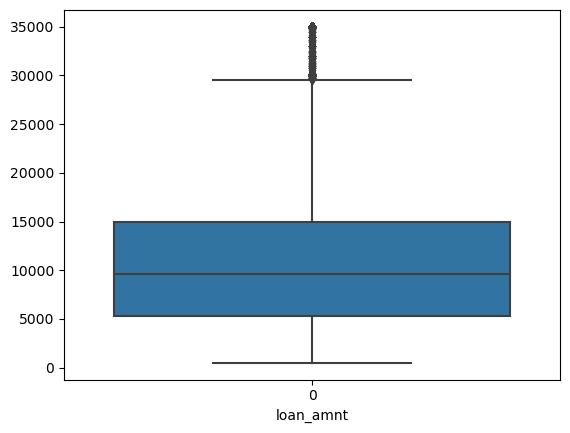

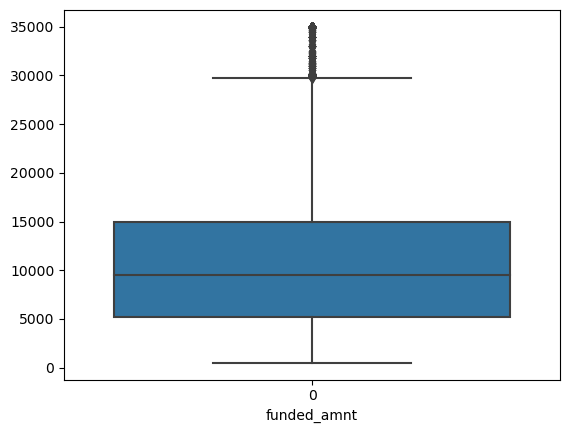

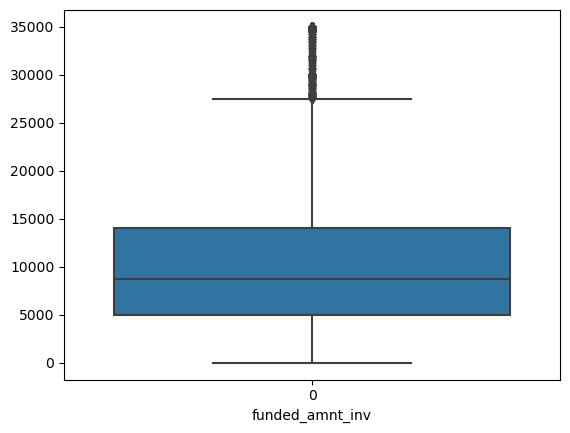

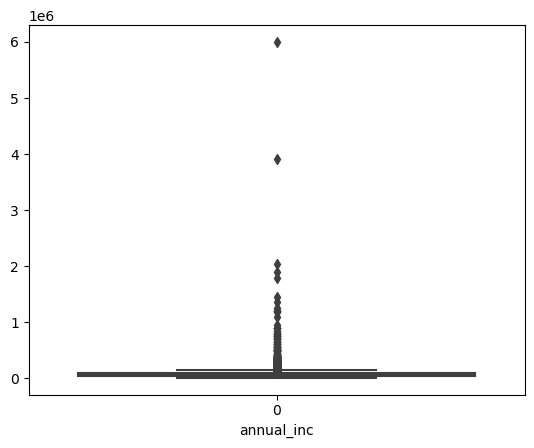

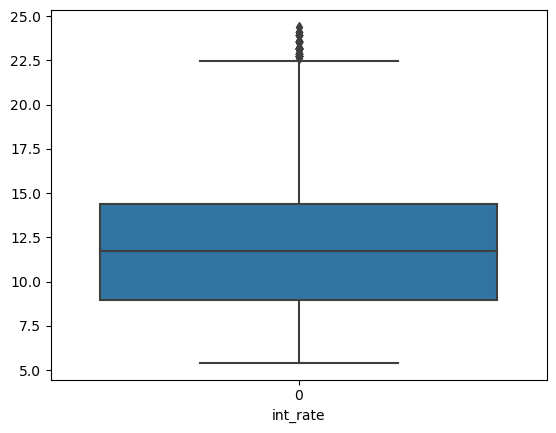

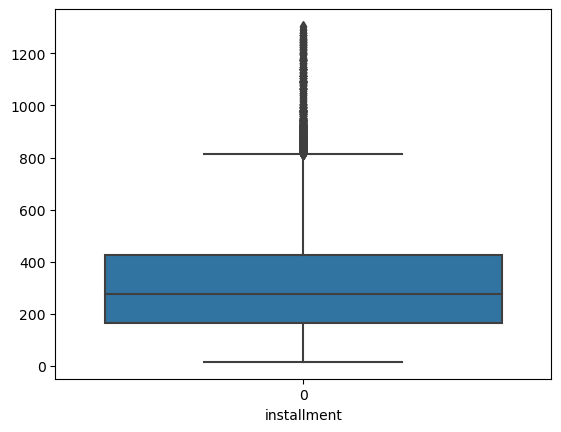

In [127]:
plotcol = ["loan_amnt","funded_amnt","funded_amnt_inv","annual_inc","int_rate","installment"]

for pltcol in plotcol:
    sns.boxplot(loan_Data_2[pltcol])
    plt.xlabel(pltcol)
    plt.show()


In [128]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_Data_2 =remove_outliers_iqr(loan_Data_2, plotcol,1.5)



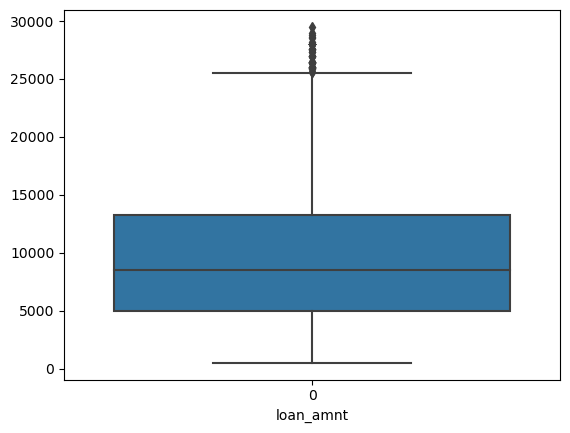

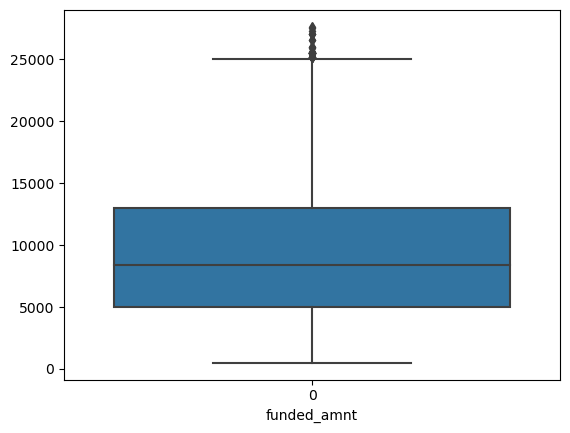

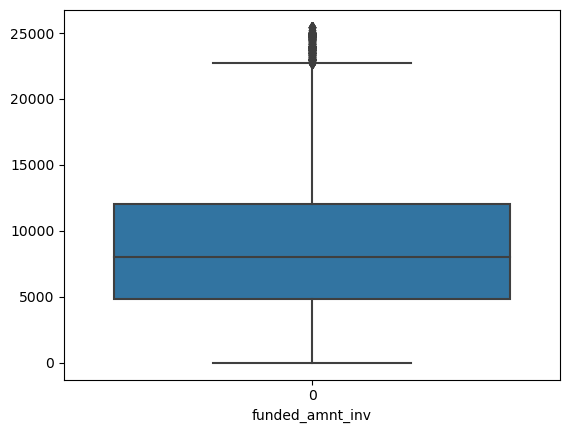

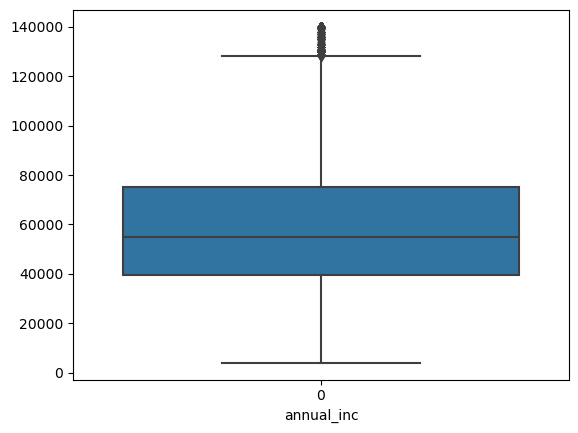

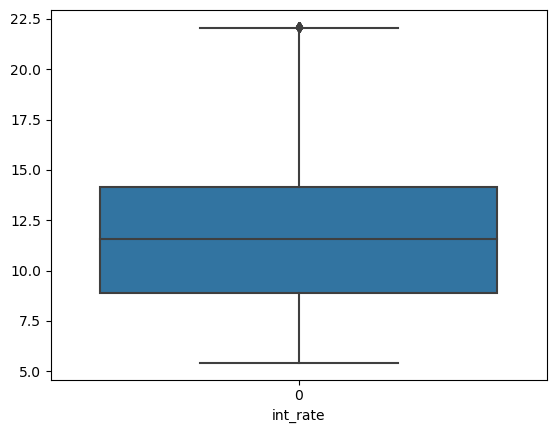

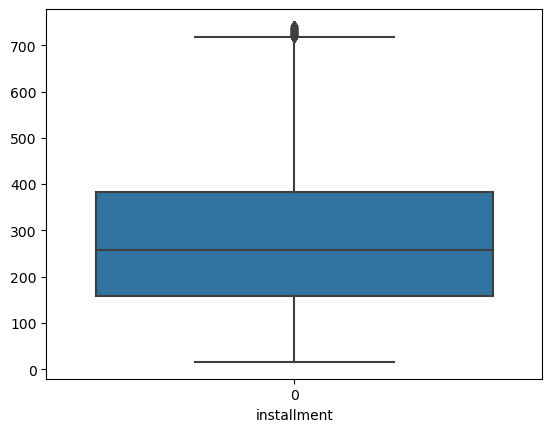

In [129]:
#CHECK IF OUTLIER REMOVED :
for pltcol in plotcol:
    sns.boxplot(loan_Data_2[pltcol])
    plt.xlabel(pltcol)
    plt.show()


## 6 Buckting for plots

In [134]:
#Creating categories for loan amounts for further bivariate analysis
loan_Data_2['loan_amnt_categories']=pd.cut(loan_Data_2['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

#Creating categories for annual incomes for further bivariate analysis
loan_Data_2['annual_inc_categories']=pd.cut(loan_Data_2['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further bivariate analysis
loan_Data_2['interest_rate_categories']=pd.cut(loan_Data_2['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further bivariate analysis
loan_Data_2['dti_categories']=pd.cut(loan_Data_2['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

print(loan_Data_2.shape)

loan_Data_2.head(5)

(34668, 47)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_categories,annual_inc_categories,interest_rate_categories,dti_categories
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,Dec,2011,0-7000,20000-40000,10-13,NaN
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,Dec,2011,0-7000,20000-40000,12.5-16,0-5
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,Dec,2011,0-7000,0-20000,12.5-16,5-10
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,Dec,2011,7000-14000,40000-60000,12.5-16,15-20
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,...,Jan-15,161.03,Jan-16,0.0,Dec,2011,0-7000,20000-40000,0-10,10-15


## 7 Univarient Analysis

##### Analysis of Loan amount , funded amount and funded amount inv ----------------------------

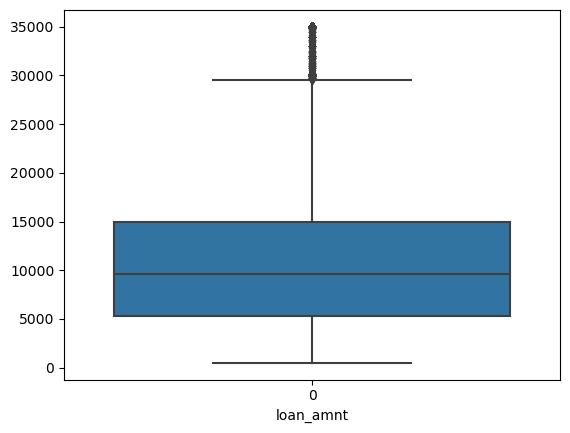

count    34668.000000
mean      9691.095535
std       5743.609982
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13225.000000
max      29500.000000
Name: loan_amnt, dtype: float64

In [137]:


sns.boxplot(loan_Data_1["loan_amnt"])
plt.xlabel("loan_amnt")
plt.show()

loan_Data_2['loan_amnt'].describe()

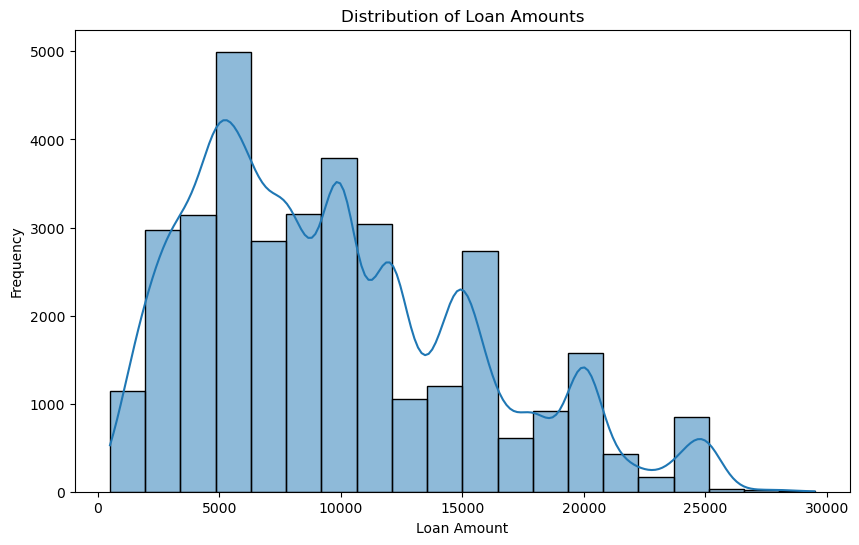

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_Data_2['loan_amnt'], bins=20, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

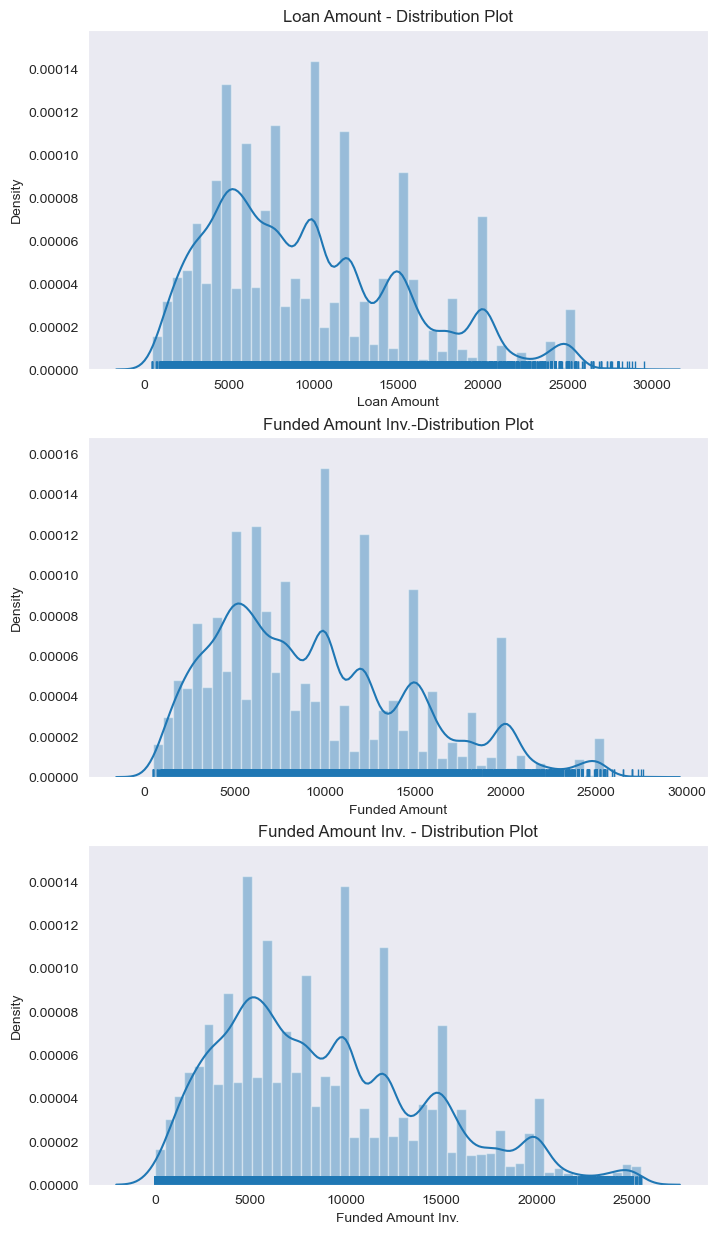

In [152]:
plt.figure(figsize=(8,15))
#sns.set_style("light")
#with plt.style.context('light_background'):

  #subplot1
plt.subplot(3,1,1)
ax=sns.distplot(loan_Data_2['loan_amnt'],rug=True)
ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


  #subplot2
plt.subplot(3,1,2)
ax=sns.distplot(loan_Data_2['funded_amnt'],rug=True)
ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount')


#subplot3

plt.subplot(3, 1, 3)
ax = sns.distplot(loan_Data_2['funded_amnt_inv'],rug = True)
ax.set(title='Funded Amount Inv. - Distribution Plot',xlabel='Funded Amount Inv.')

plt.show()



# <font color="red">*Observations 01 -</font>

 1. Distribution of amounts for all three looks very much similar.
 2. Most of the loan amount applied was in the range of 5k-14k.
 3. Max Loan amount applied was ~27k or ~28k

##### Analysis of Anual Income ----------------------------

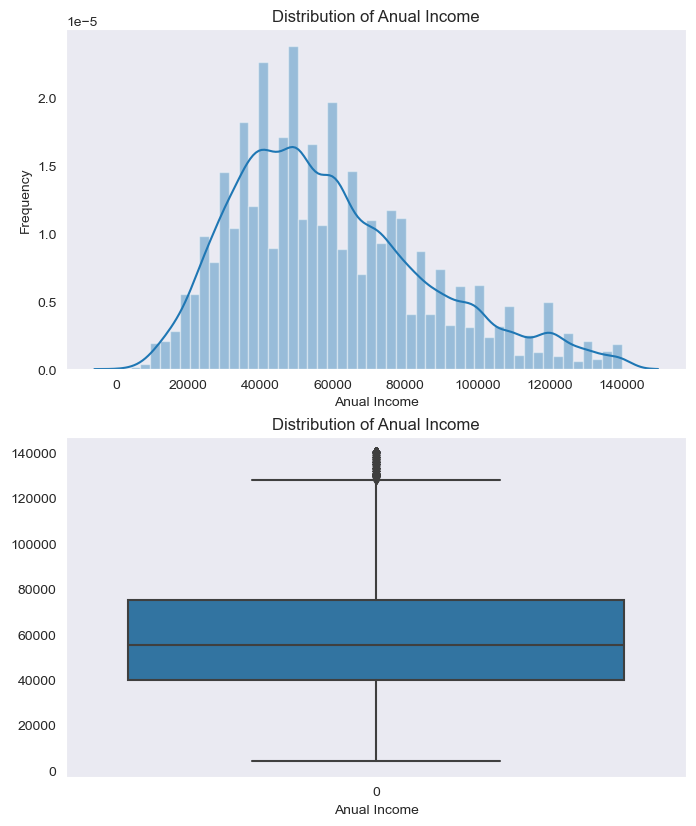

In [155]:
plt.figure(figsize=(8,15))

plt.subplot(3,1,1)
sns.distplot(loan_Data_2['annual_inc'])
plt.title('Distribution of Anual Income')
plt.xlabel('Anual Income')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
sns.boxplot(loan_Data_2['annual_inc'])
plt.title('Distribution of Anual Income')
plt.xlabel('Anual Income')


plt.show()

# <font color="red">*Observations 02 -</font>

 1. Annual income of most of applicants lies between 40k-75k

##### Analysis of Intrest rate ----------------------------

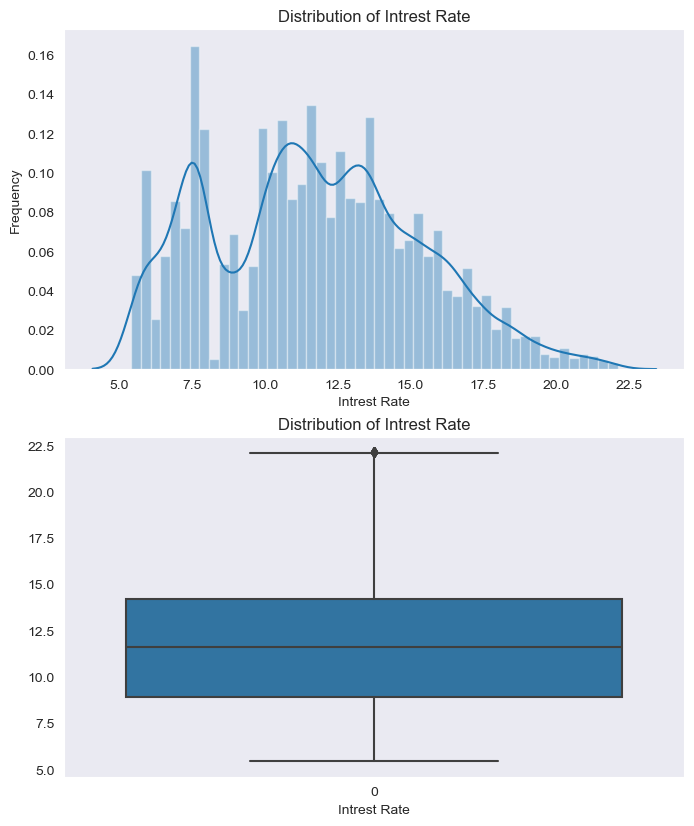

In [157]:
plt.figure(figsize=(8,15))

plt.subplot(3,1,1)
sns.distplot(loan_Data_2['int_rate'])
plt.title('Distribution of Intrest Rate')
plt.xlabel('Intrest Rate')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
sns.boxplot(loan_Data_2['int_rate'])
plt.title('Distribution of Intrest Rate')
plt.xlabel('Intrest Rate')


plt.show()

In [159]:
loan_Data_2['int_rate'].describe()

count    34668.000000
mean        11.722741
std          3.577678
min          5.420000
25%          8.900000
50%         11.580000
75%         14.172500
max         22.110000
Name: int_rate, dtype: float64

# <font color="red">*Observations 03 -</font>

 1.Most of the applicant's rate of interesrt is between in the range of 8%-14%.
 
 2.Average Rate of interest of rate is 11.7 %

##### Unordered catagorical  variable Analysis of Loan Status ----------------------------

Text(0, 0.5, 'Loan Application Count')

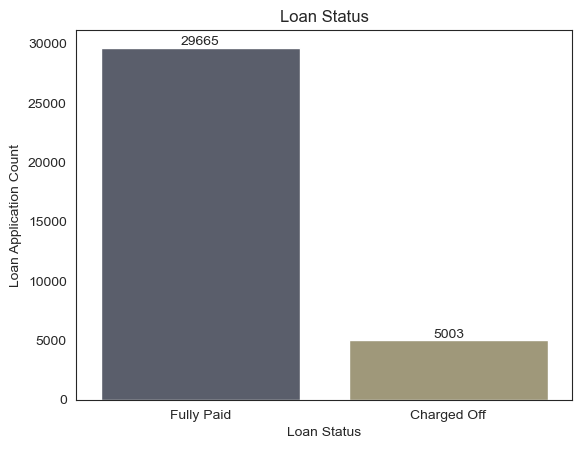

In [168]:
ax = sns.countplot(x="loan_status", data=loan_Data_2, palette="cividis")
ax.bar_label(ax.containers[0])
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Application Count')



##### Unordered catagorical  variable Analysis of Home owner ship ----------------------------

<Axes: xlabel='home_ownership'>

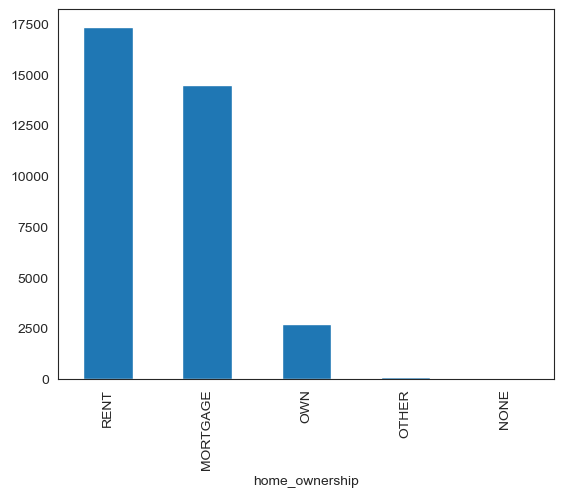

In [169]:
loan_Data_2['home_ownership'].value_counts().plot.bar()

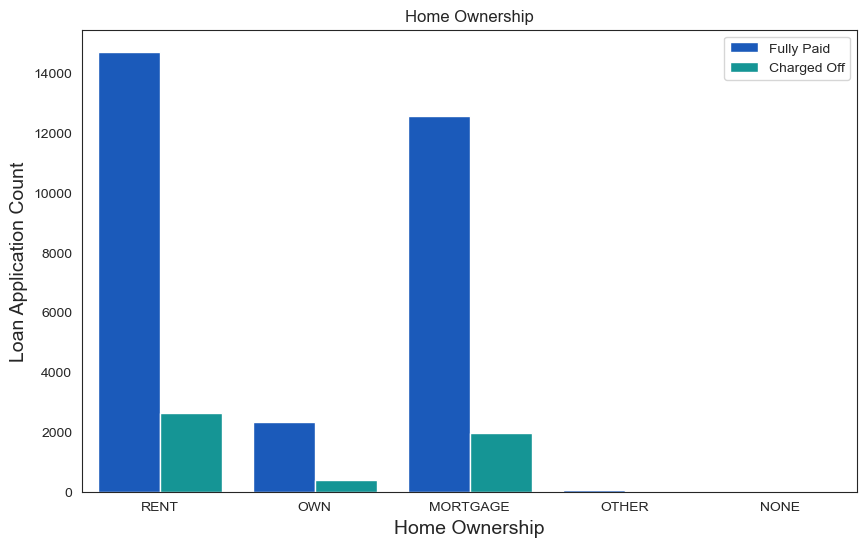

In [320]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="home_ownership",data=loan_Data_2,hue='loan_status',palette='winter')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()


# <font color="red">*Observations 04 -</font>

 1.Majority of loan applicants are either living on Rent or on Mortgage , and majorly these people defaulted the loan


##### Unordered catagorical  variable Analysis of Purpose ----------------------------

<Axes: xlabel='purpose'>

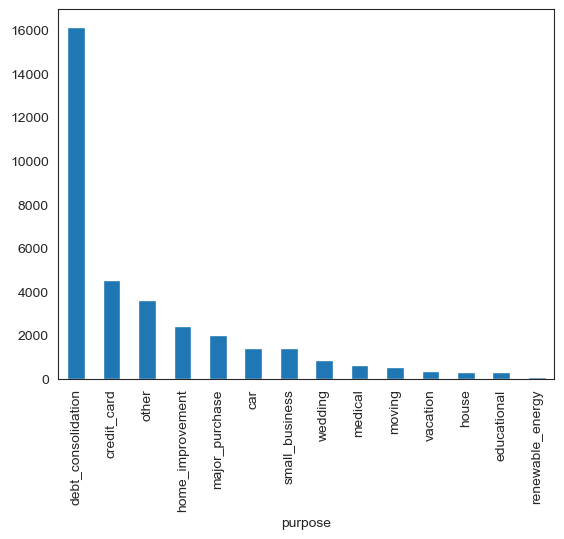

In [174]:
loan_Data_2['purpose'].value_counts().plot.bar()

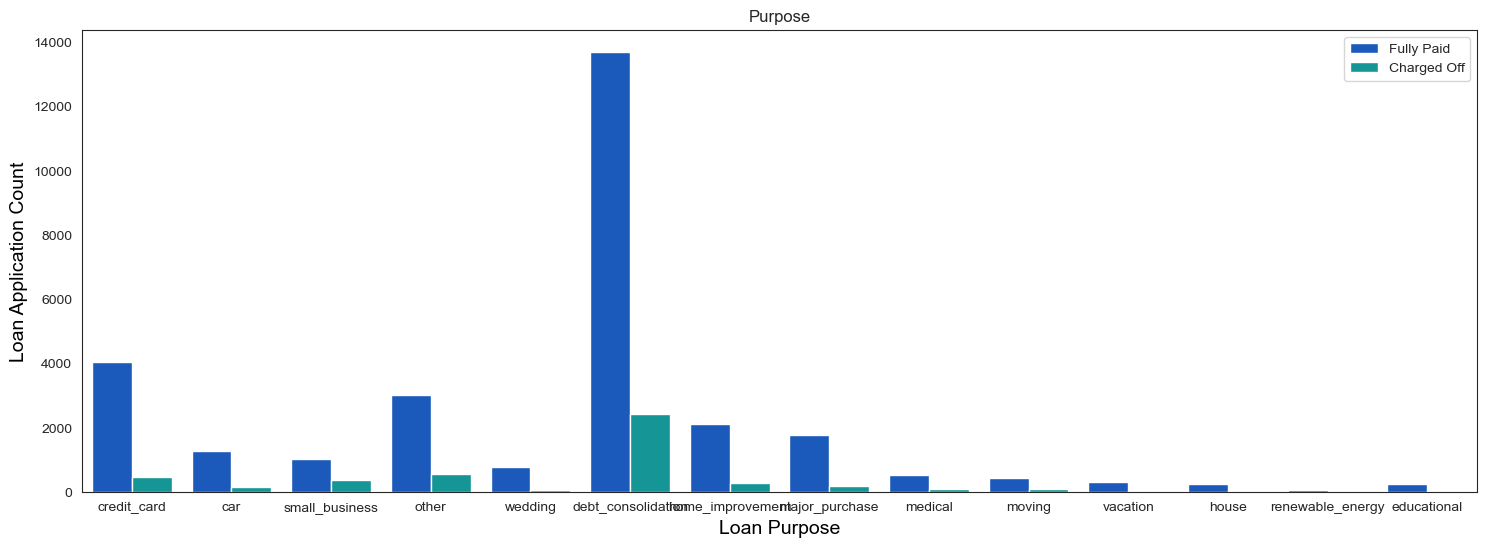

In [195]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x="purpose",data=loan_Data_2,hue='loan_status',palette='winter')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Purpose')
ax.set_xlabel('Loan Purpose',fontsize=14,color='black')
ax.set_ylabel('Loan Application Count',fontsize=14,color='black')
plt.show()

# <font color="red">*Observations 05 -</font>

 1.Most of the applicant are for debt_consolidations and compared to other these people defaulted the loan


#### analysis for addr_state ------------------

<Axes: ylabel='count'>

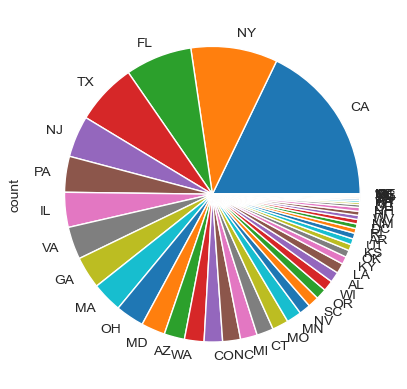

In [182]:
loan_Data_2['addr_state'].value_counts().plot(kind="pie")

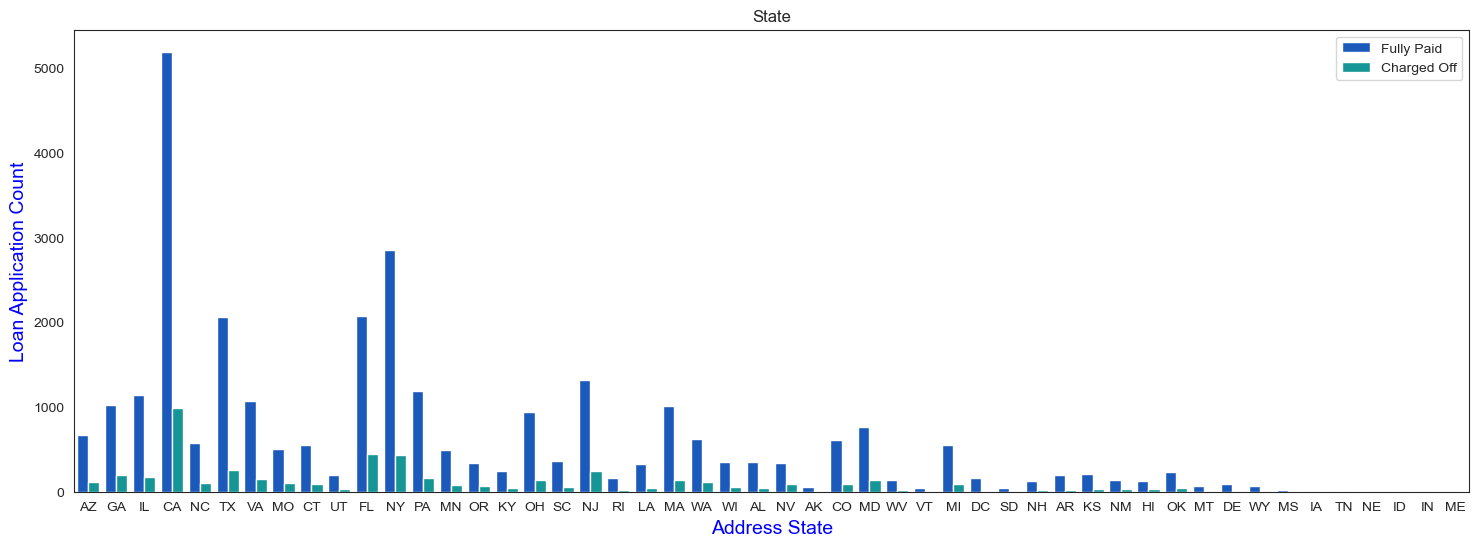

In [196]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x="addr_state",data=loan_Data_2,hue='loan_status',palette='winter')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='State')
ax.set_xlabel('Address State',fontsize=14,color='b')
ax.set_ylabel('Loan Application Count',fontsize=14,color='b')
plt.show()

# <font color="red">*Observations 06 -</font>

 1.Most of the applicant are from CA and maximum people who defaulted are also from CA


#### analysis for Employee length ------------------

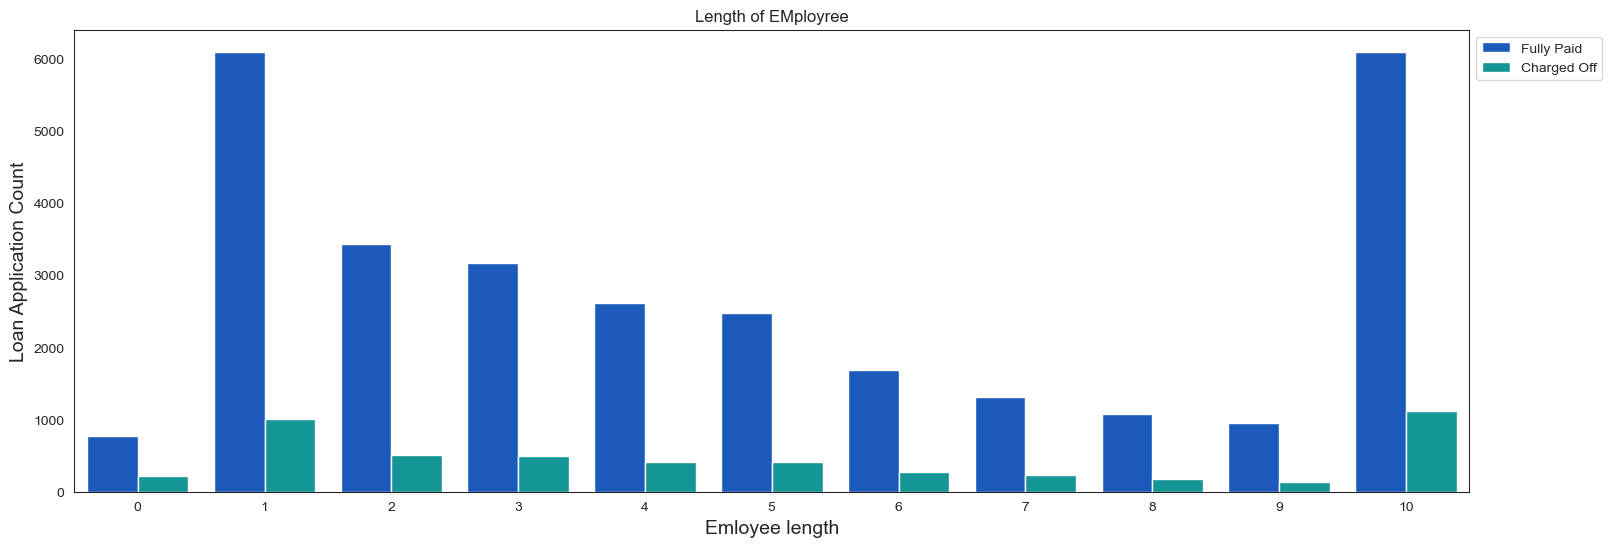

In [197]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x="emp_length",data=loan_Data_2,hue='loan_status',palette='winter')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Length of EMployree')
ax.set_xlabel('Emloyee length',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

# <font color="red">*Observations 07 -</font>

 1.Most of the applications are having 10+ yrs of Exp.



#### univarient analysis of - Loan Paying Term

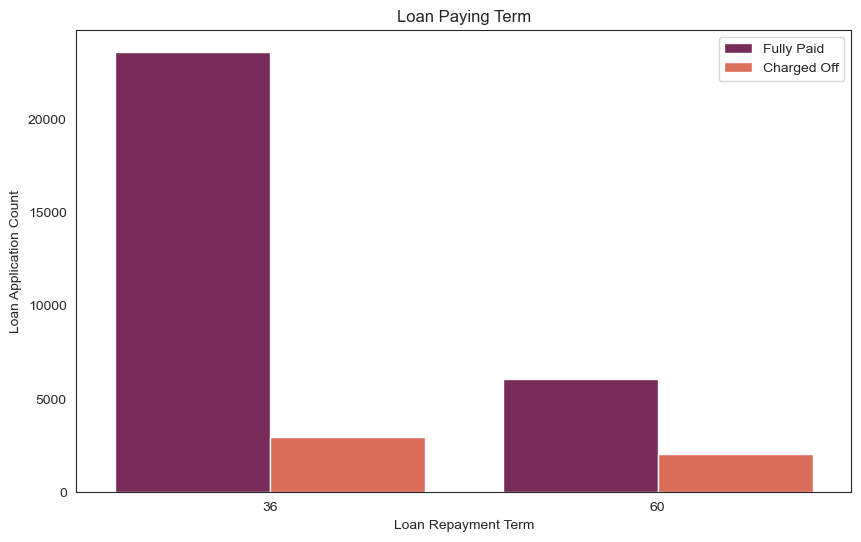

In [198]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="term",data=loan_Data_2,hue='loan_status',palette='rocket')
ax.set(title='Loan Paying Term')
ax.set_xlabel('Loan Repayment Term')
ax.set_ylabel('Loan Application Count')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# <font color="red">*Observations 08 -</font>

 1.those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.



## 8. Bivarient Analysis

#### analysis of annual income on charged off loans

In [190]:
inc_range_vs_loan = loan_Data_2.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1506,6991,8497,0.177239
2,40000-60000,1656,9349,11005,0.150477
3,60000-80000,908,6157,7065,0.128521
4,80000+,696,6225,6921,0.100564


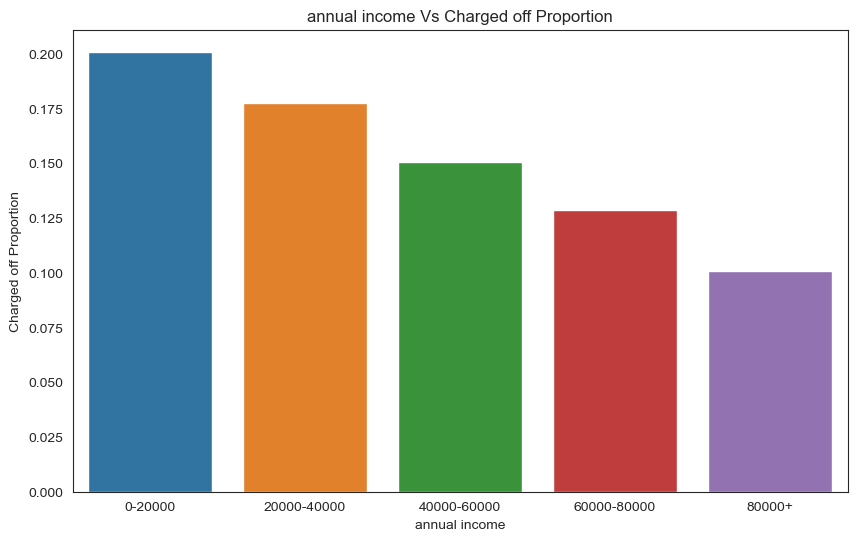

In [203]:
#Drawing Barplots on above table


plt.figure(figsize=(10,6))
sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
plt.title('annual income Vs Charged off Proportion')
plt.ylabel('Charged off Proportion')
plt.xlabel('annual income')      

plt.show()

# <font color="red">*Observations 09 -</font>

1. Income range 80000+  has less chances of charged off.
2. Income range 0-20000 has high chances of charged off.
3. With increase in annual income charged off proportion got decreased. So, annnual income is  inversely proportional to charged off loan



#### Analysis for purpose of Loan Vs Charged Off Proportion

In [206]:

purpose_vs_loan = loan_Data_2.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,389,1048,1437,0.270703
10,renewable_energy,17,74,91,0.186813
3,educational,52,254,306,0.169935
8,moving,90,454,544,0.165441
9,other,579,3019,3598,0.160923
5,house,50,262,312,0.160256
7,medical,101,532,633,0.159558
2,debt_consolidation,2439,13696,16135,0.151162
12,vacation,52,311,363,0.143251
4,home_improvement,297,2115,2412,0.123134


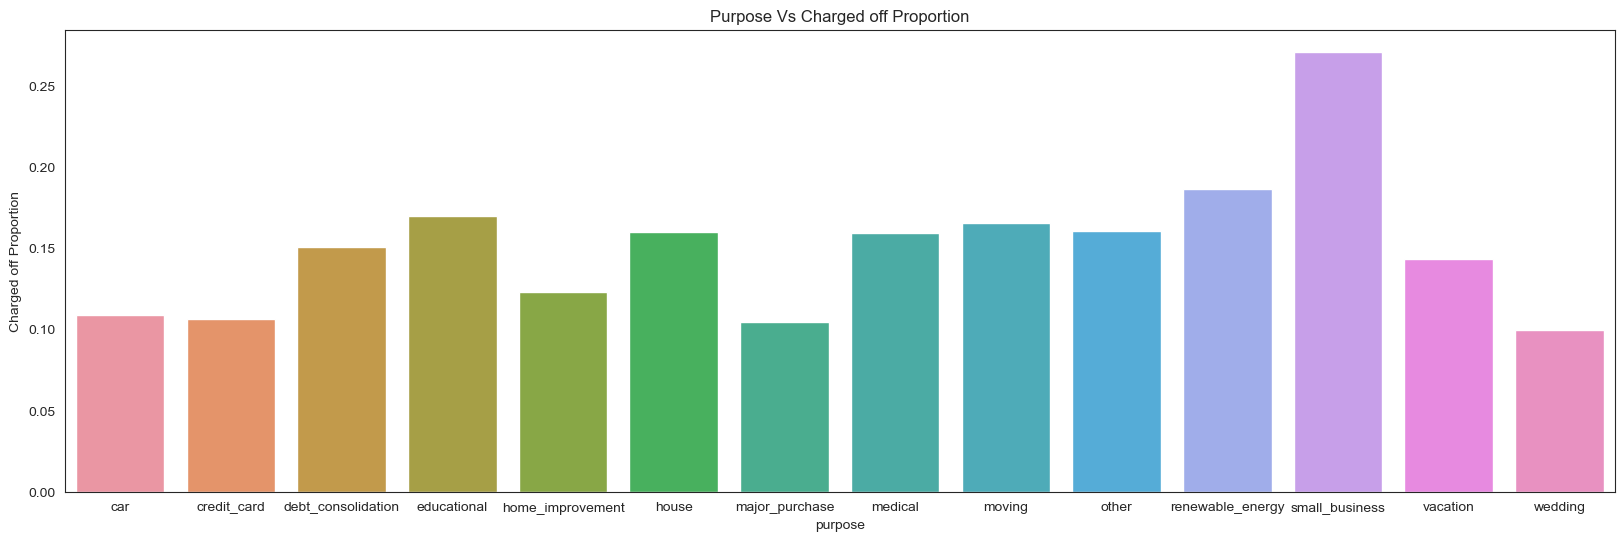

In [211]:
plt.figure(figsize=(20,6))
sns.barplot(x='purpose',y='Chargedoff_Proportion',data=purpose_vs_loan)
plt.title('Purpose Vs Charged off Proportion')
plt.xlabel('purpose')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 10 -</font>

1. loan taken for Small business have higher charged off proportion, more tendency to get charged off


##### Analysis on interest rate against charged off


In [214]:
interest_vs_loan = loan_Data_2.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off']/interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion',ascending=False)



loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16+,1049,2751,3800,0.276053
2,12.5-16,1836,8516,10352,0.177357
1,10-13,1138,7308,8446,0.134738
0,0-10,802,10816,11618,0.069031


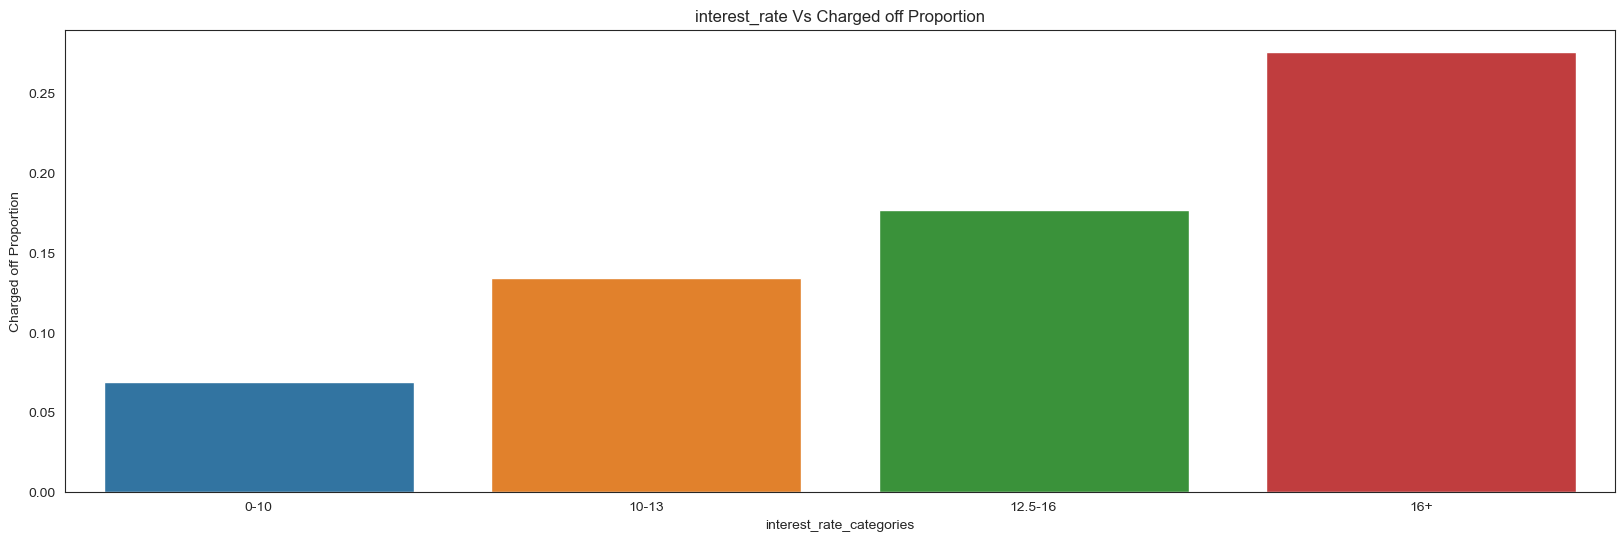

In [216]:
plt.figure(figsize=(20,6))
sns.barplot(x='interest_rate_categories',y='Chargedoff_Proportion',data=interest_vs_loan)
plt.title('interest_rate Vs Charged off Proportion')
plt.xlabel('interest_rate_categories')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 11 -</font>

1. Loan with higher intrest , 16%+ rate have higher rate of getting charged off
2. Increase in intreset rate directly proportional to increse in getting charged off


##### Analysis of grade against Charged Off Proportion


In [222]:
grade_vs_loan=loan_Data_2.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,54,102,156,0.346154
5,F,224,489,713,0.314165
4,E,568,1549,2117,0.268304
3,D,996,3456,4452,0.223720
2,C,1264,5925,7189,0.175824
1,B,1311,9225,10536,0.124431
0,A,586,8919,9505,0.061652


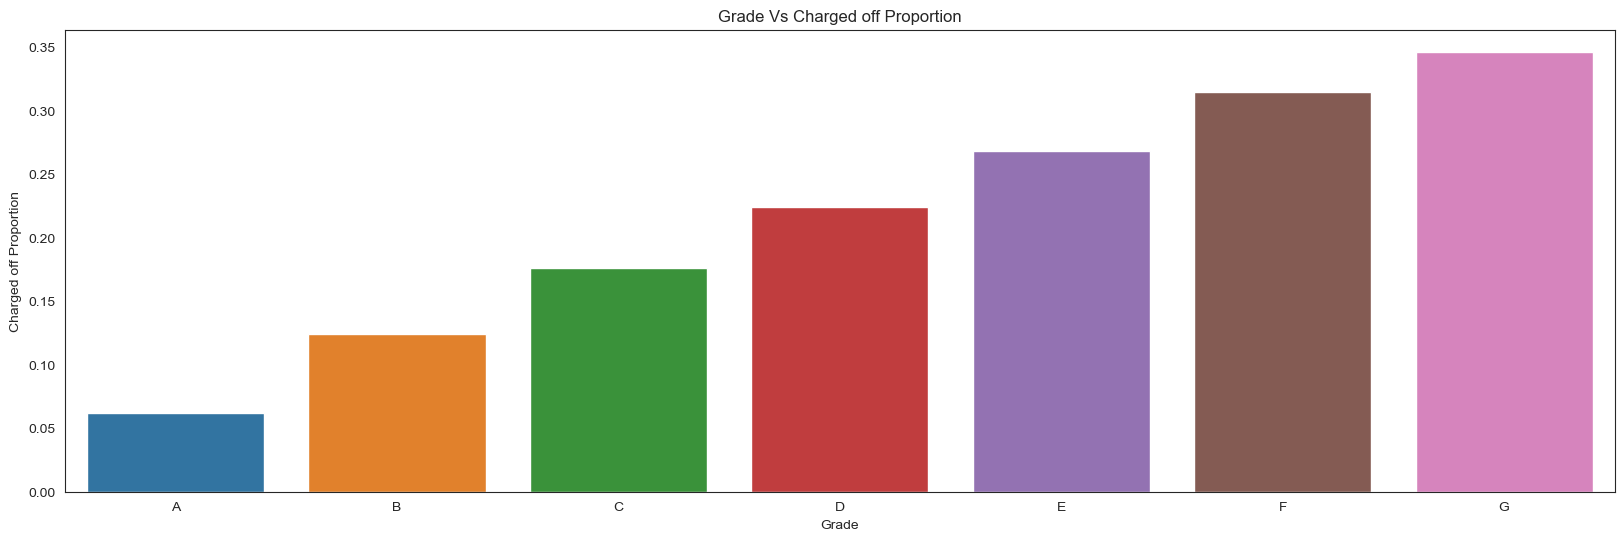

In [223]:
plt.figure(figsize=(20,6))
sns.barplot(x='grade',y='Chargedoff_Proportion',data=grade_vs_loan)
plt.title('Grade Vs Charged off Proportion')
plt.xlabel('Grade')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 12 -</font>

1. Grade A has least chances of getting charged off and Grade F &G has high chance of getting charfe doff
2. tendency of getting charged off is increasing  with grades moving from A to G


##### Analysis of sub grade against Charged Off Proportion


In [224]:
subgrade_vs_loan=loan_Data_2.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Fully Paid']
subgrade_vs_loan['Chargedoff_Proportion']=subgrade_vs_loan['Charged Off']/subgrade_vs_loan['Total']
subgrade_vs_loan.sort_values('Chargedoff_Proportion',ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,31,33,64,0.484375
34,G5,6,8,14,0.428571
31,G2,14,25,39,0.358974
32,G3,8,15,23,0.347826
30,G1,19,36,55,0.345455
28,F4,38,77,115,0.330435
26,F2,56,125,181,0.309392
23,E4,102,235,337,0.302671
27,F3,37,89,126,0.293651
24,E5,80,195,275,0.290909


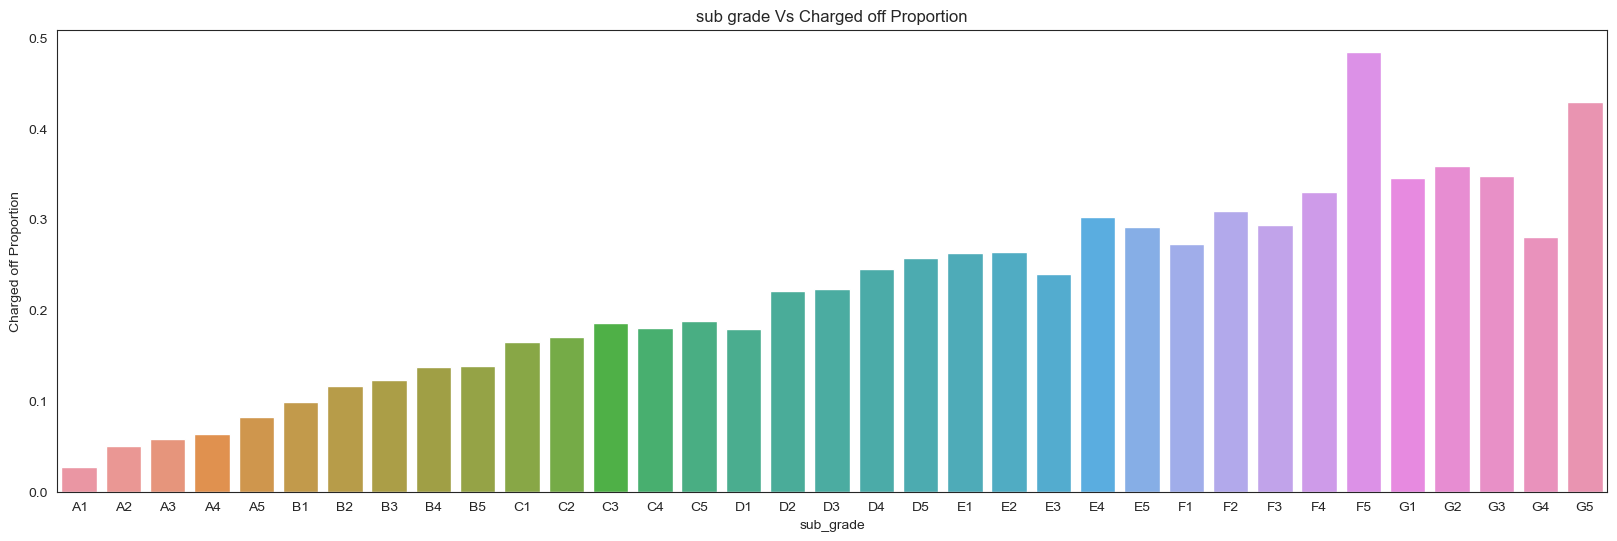

In [225]:
plt.figure(figsize=(20,6))
sns.barplot(x='sub_grade',y='Chargedoff_Proportion',data=subgrade_vs_loan)
plt.title('sub grade Vs Charged off Proportion')
plt.xlabel('sub_grade')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 13 -</font>

1. Subgrade G Subgrade F have high chances of getting charged off
2. Chances of getting charged off is increasing  with  Subgrades moving from A to G


#### Bivariate Analysis of Home Ownership against Chargedoff_Proportion

In [248]:
home_ownership_vs_loan = loan_Data_2.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,OTHER,16.0,73.0,89.0,0.179775
4,RENT,2631.0,14713.0,17344.0,0.151695
3,OWN,404.0,2319.0,2723.0,0.148366
0,MORTGAGE,1952.0,12557.0,14509.0,0.134537
1,NONE,0.0,3.0,3.0,0.000000


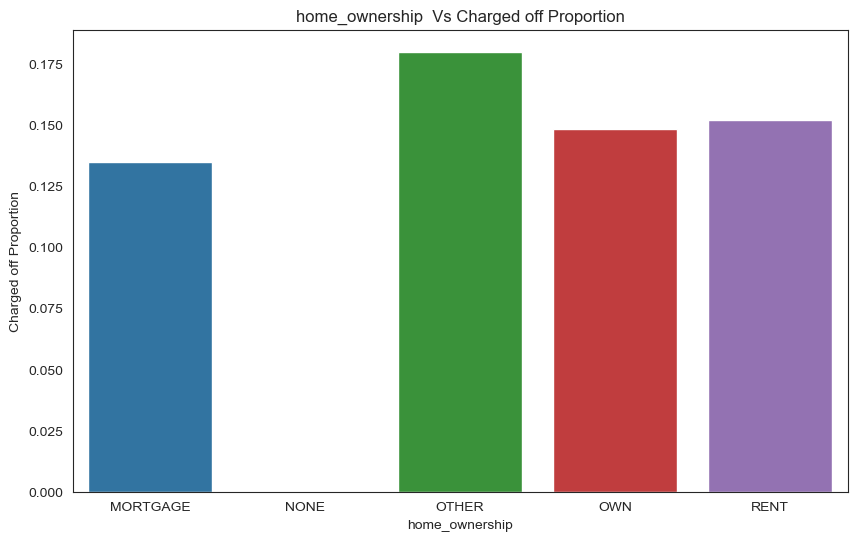

In [250]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership',y='Chargedoff_Proportion',data=home_ownership_vs_loan)
plt.title('home_ownership  Vs Charged off Proportion')
plt.xlabel('home_ownership')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 14 -</font>

1. Not significant conclusion through home owner and loan defaulter. bBut certainely those who are not owning the home is having slightly high chances of loan defaults.


#### analysis on employment length vs Charged Off Proportion

In [227]:
emplen_vs_loan = loan_Data_2.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion',ascending=False)


loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,219,767,986,0.222110
10,10,1116,6097,7213,0.154721
7,7,238,1315,1553,0.153252
8,8,179,1077,1256,0.142516
5,5,409,2475,2884,0.141817
1,1,1004,6093,7097,0.141468
6,6,275,1681,1956,0.140593
3,3,497,3164,3661,0.135755
4,4,411,2622,3033,0.135509
2,2,515,3427,3942,0.130644


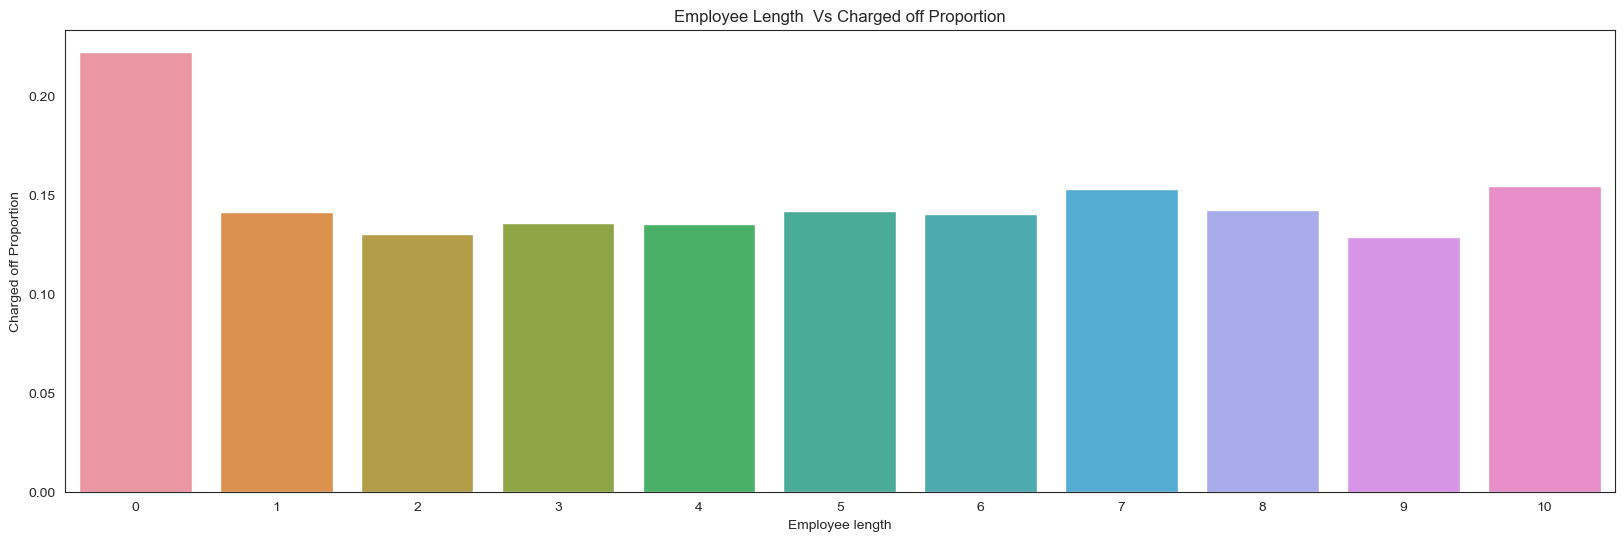

In [229]:
plt.figure(figsize=(20,6))
sns.barplot(x='emp_length',y='Chargedoff_Proportion',data=emplen_vs_loan)
plt.title('Employee Length  Vs Charged off Proportion')
plt.xlabel('Employee length')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 15 -</font>

1. Employee with less than 1 year of experience or not working has high tendendy to get loan defaulted , as they less experience or just started the job so don't have much amount or not having fixed source of income


#### Analysis of State vs Charged off propotion

In [230]:
state_vs_loan = loan_Data_2.groupby(["addr_state" ,"loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid']
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off']/state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion',ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,94.0,337.0,431.0,0.218097
40,SD,12.0,48.0,60.0,0.200000
13,ID,1.0,4.0,5.0,0.200000
11,HI,28.0,122.0,150.0,0.186667
0,AK,12.0,54.0,66.0,0.181818
9,FL,448.0,2078.0,2526.0,0.177356
24,MO,107.0,510.0,617.0,0.173420
31,NM,29.0,141.0,170.0,0.170588
4,CA,992.0,5196.0,6188.0,0.160310


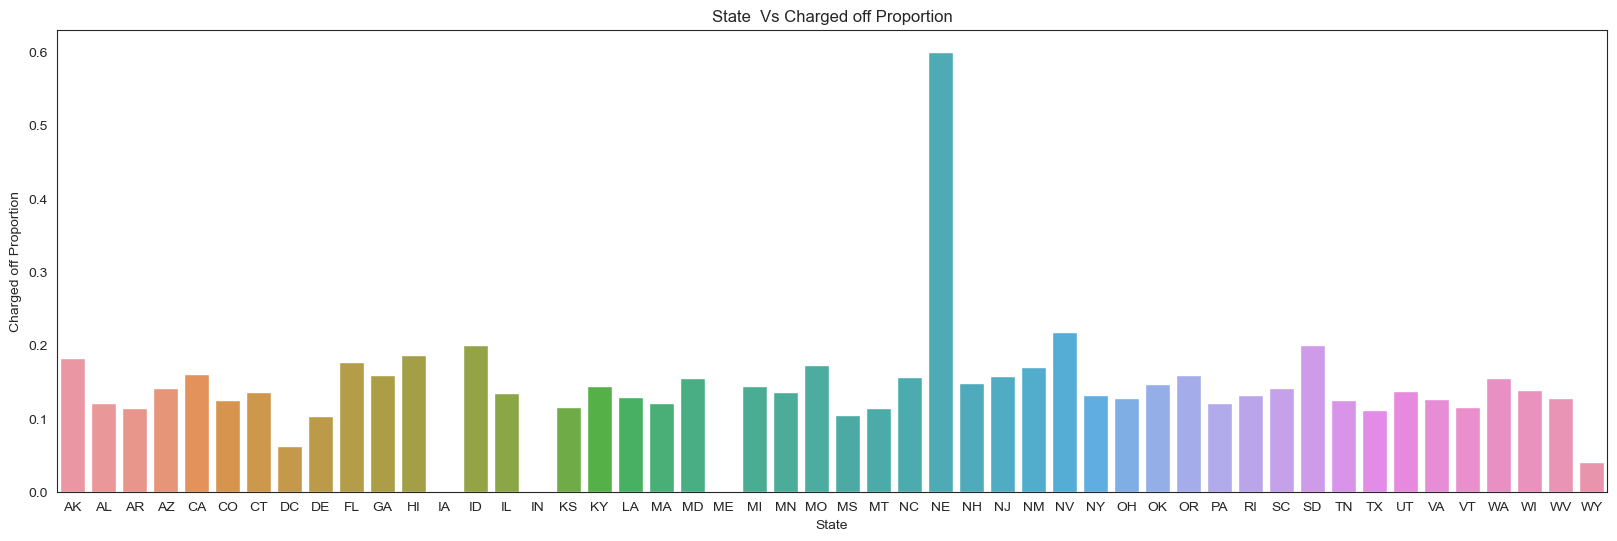

In [232]:
plt.figure(figsize=(20,6))
sns.barplot(x='addr_state',y='Chargedoff_Proportion',data=state_vs_loan)
plt.title('State  Vs Charged off Proportion')
plt.xlabel('State')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 16 -</font>

1. States NE has very high chances of charged off but as per number of application analysis earlier , number of applications are too low for NE to make any decisions.States NV,CA and FL states shows good number of charged offs in good number of applications


#### Bivariate Analysis on DTI against Chargedoff_Proportion -

In [252]:
dti_vs_loan = loan_Data_2.groupby(['dti_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,25+,1030,5057,6087,0.169213
3,15-20,1229,6757,7986,0.153894
2,10-15,1250,7424,8674,0.144109
1,5-10,864,6054,6918,0.124892
0,0-5,526,3740,4266,0.123301


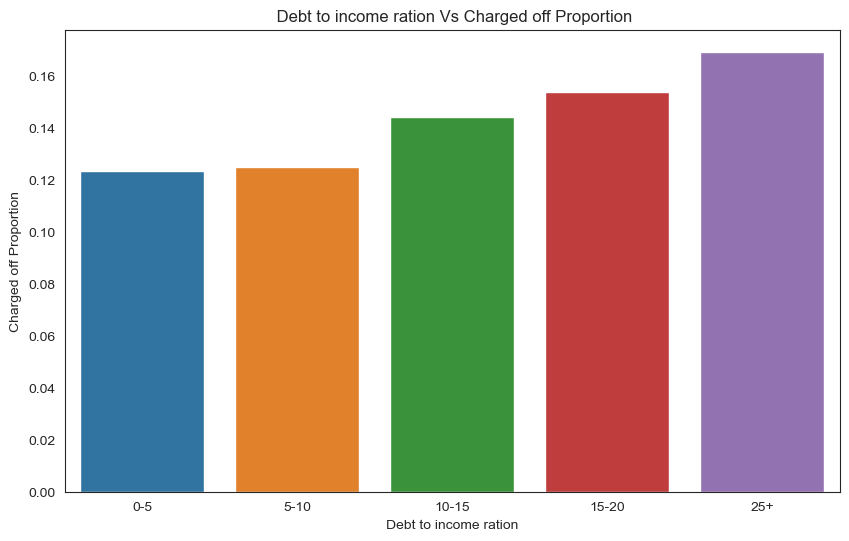

In [253]:
plt.figure(figsize=(10,6))
sns.barplot(x='dti_categories',y='Chargedoff_Proportion',data=dti_vs_loan)
plt.title(' Debt to income ration Vs Charged off Proportion')
plt.xlabel('Debt to income ration')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 17 -</font>

1. High DTI value  having high risk of defaults


#### analysis of verification status against Charged Off Proportion

In [235]:
verifyStatus_vs_loan = loan_Data_2.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verifyStatus_vs_loan['Total'] = verifyStatus_vs_loan['Charged Off']+verifyStatus_vs_loan['Fully Paid']
verifyStatus_vs_loan['Chargedoff_Proportion'] = verifyStatus_vs_loan['Charged Off']+verifyStatus_vs_loan['Total']
verifyStatus_vs_loan.sort_values('Chargedoff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,Not Verified,2051,13982,16033,18084
2,Verified,1633,8080,9713,11346
1,Source Verified,1319,7603,8922,10241


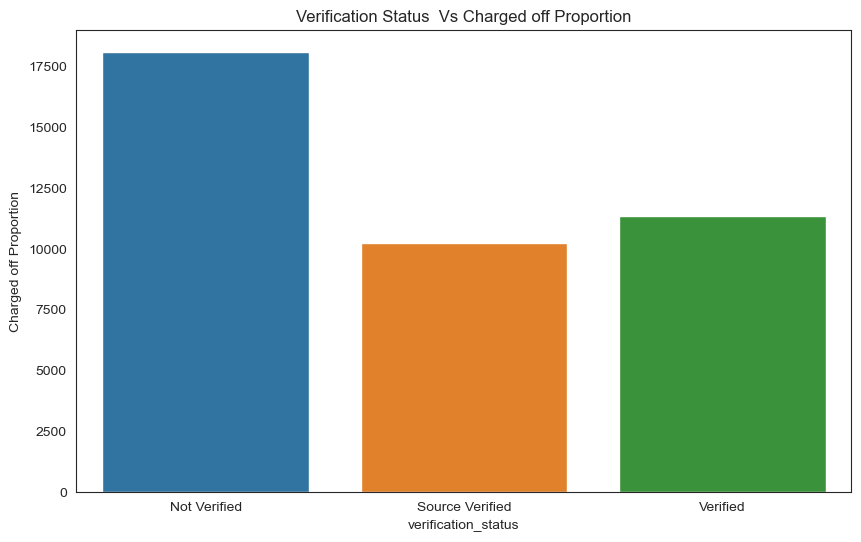

In [238]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status',y='Chargedoff_Proportion',data=verifyStatus_vs_loan)
plt.title('Verification Status  Vs Charged off Proportion')
plt.xlabel('verification_status')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 18 -</font>

1. Loan which are not verified having high chances of getting defaulted


#### analysis on pub_rec_bankruptcies against ChargedOff Proportion

In [240]:

bankruptcies_vs_loan = loan_Data_2.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,339,1209,1548,0.218992
3,Not Known,96,527,623,0.154093
0,0.0,4566,27926,32492,0.140527


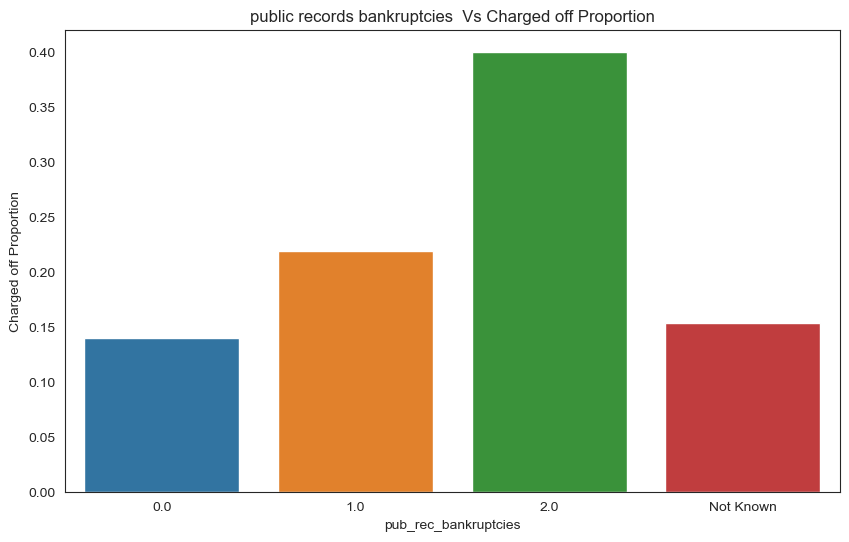

In [241]:
plt.figure(figsize=(10,6))
sns.barplot(x='pub_rec_bankruptcies',y='Chargedoff_Proportion',data=bankruptcies_vs_loan)
plt.title('public records bankruptcies  Vs Charged off Proportion')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 19 -</font>

1. Those who already have pub_rec_bankruptcies value 1 or 2 , have higher charged off proportion than who do not have pub_rec_bankruptcies.
2. Not known is the column for which we do not have any information abount borrower.
3. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.


#### analysis on issues in credit having Number of derogatory public records against ChargedOff Proportion

In [246]:
publicRecord_vs_loan = loan_Data_2.groupby(['pub_rec','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
publicRecord_vs_loan['Total'] = publicRecord_vs_loan['Charged Off'] + publicRecord_vs_loan['Fully Paid'] 
publicRecord_vs_loan['Chargedoff_Proportion'] = publicRecord_vs_loan['Charged Off'] / publicRecord_vs_loan['Total']
publicRecord_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,424.0,1481.0,1905.0,0.222572
2,2,10.0,36.0,46.0,0.217391
0,0,4569.0,28140.0,32709.0,0.139686
3,3,0.0,6.0,6.0,0.000000
4,4,0.0,2.0,2.0,0.000000


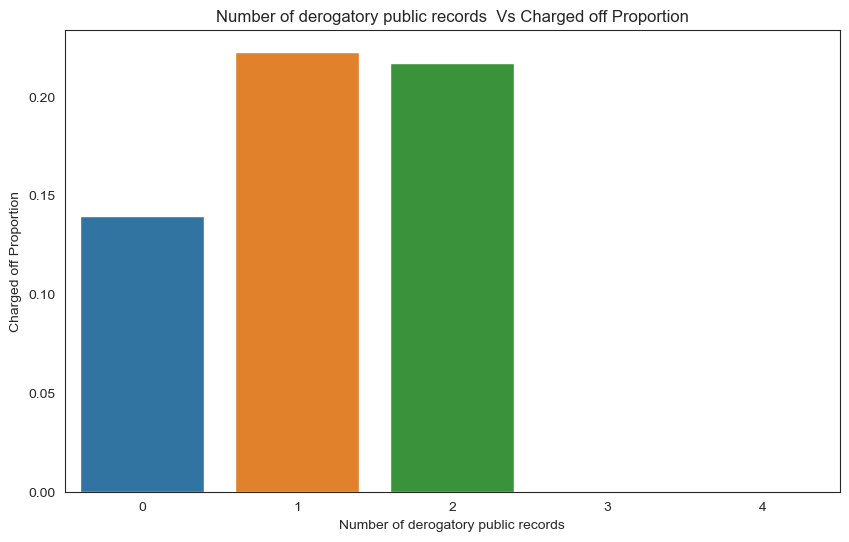

In [247]:
plt.figure(figsize=(10,6))
sns.barplot(x='pub_rec',y='Chargedoff_Proportion',data=publicRecord_vs_loan)
plt.title('Number of derogatory public records  Vs Charged off Proportion')
plt.xlabel('Number of derogatory public records')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 20 -</font>

1. Those who already have pub_rec value 1 or 2 , have higher charged off proportion compare to who don't have any public records
2. As the number of public records increase , tendency to get charged off increases


#### Bivariate Analysis on Issues of Year  against Chargedoff_Proportion

In [254]:
issue_year_vs_loan = loan_Data_2.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,35,181,216,0.162037
4,2011,2833,15240,18073,0.156753
1,2008,220,1226,1446,0.152144
3,2010,1379,9232,10611,0.129959
2,2009,536,3786,4322,0.124017


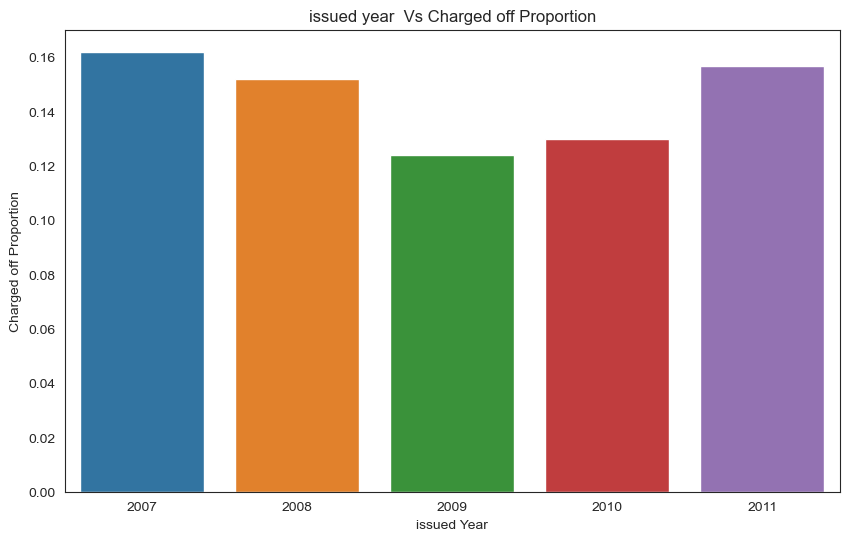

In [256]:
plt.figure(figsize=(10,6))
sns.barplot(x='issue_year',y='Chargedoff_Proportion',data=issue_year_vs_loan)
plt.title('issued year  Vs Charged off Proportion')
plt.xlabel('issued Year')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 21 -</font>

1. Year 2007 is highest loan defaults and 2009 is having lowest loan defaults.


#### Analysis on Month of Issue of loan Record against Chargedoff_Proportion

In [263]:
issue_month_vs_loan = loan_Data_2.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=True)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
7,Mar,301,2107,2408,0.125000
3,Feb,269,1875,2144,0.125466
0,Apr,330,2227,2557,0.129057
4,Jan,296,1881,2177,0.135967
1,Aug,420,2623,3043,0.138022
5,Jul,428,2630,3058,0.139961
9,Nov,520,3069,3589,0.144887
10,Oct,494,2808,3302,0.149606
6,Jun,431,2443,2874,0.149965
8,May,420,2240,2660,0.157895


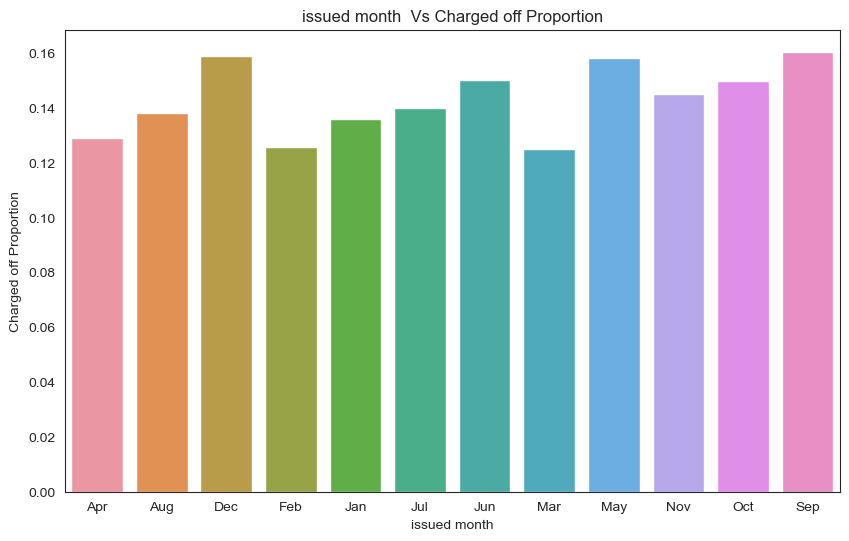

In [264]:
plt.figure(figsize=(10,6))
sns.barplot(x='issue_month',y='Chargedoff_Proportion',data=issue_month_vs_loan)
plt.title('issued month  Vs Charged off Proportion')
plt.xlabel('issued month')
plt.ylabel('Charged off Proportion')

plt.show()

# <font color="red">*Observations 22 -</font>

1. Loans issued in May, September and december is having high number of loan defaults


### Bivariate Analysis-Term of Loan vs. Interest Rate Box Plot

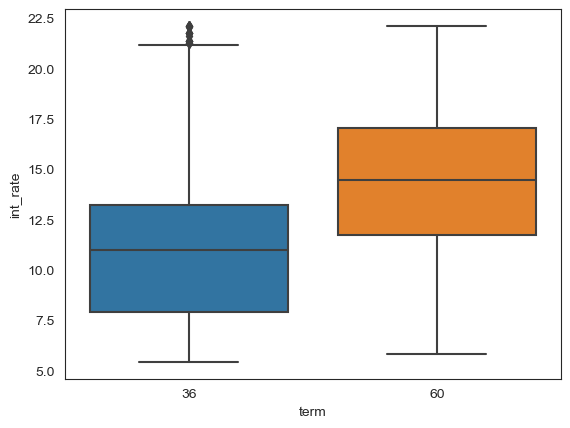

In [268]:
sns.boxplot(y='int_rate',x='term',data=loan_Data_2)

plt.show()

# <font color="red">*Observations 23 -</font>
1. Avearge intrest rate is higher for 60 months loan term.
2. Most of the loans issued for longer term had higher intrest rates for repayement.

##### Bivariate Analysis - Intrest rate vs Purpose

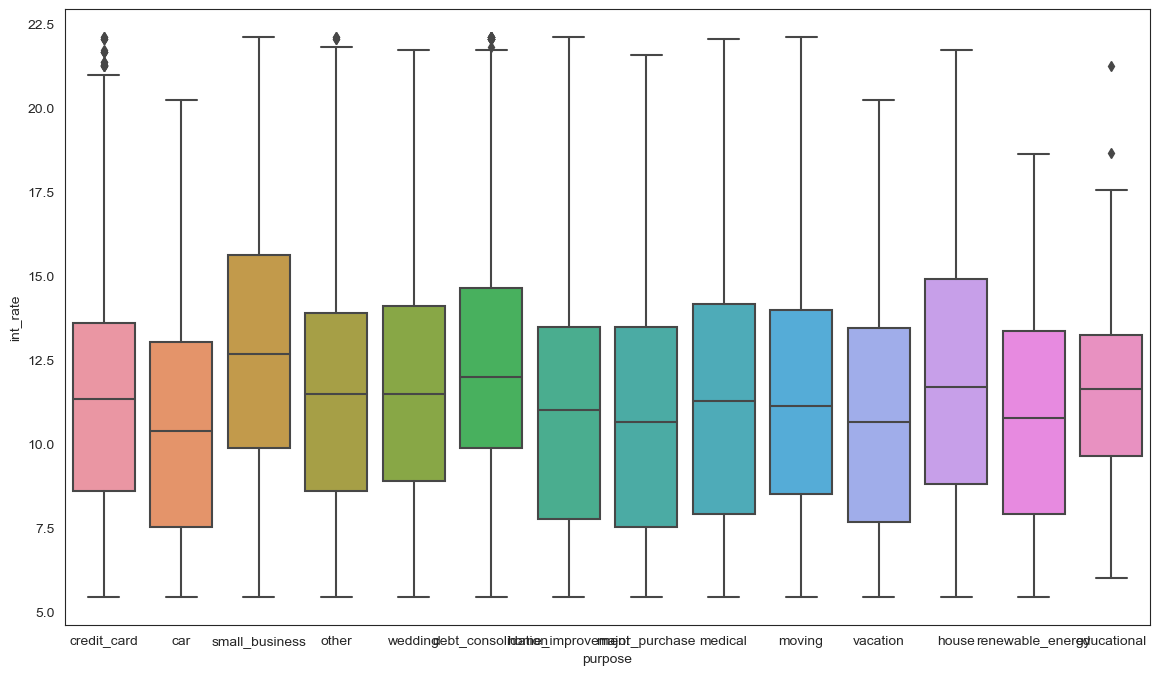

In [271]:
plt.figure(figsize=(14,8))
sns.boxplot(y='int_rate',x='purpose',data=loan_Data_2)

plt.show()

# <font color="red">*Observations 24 -</font>
1. avearge intrest rate is highest for small business purpose.
2. Loans taken for small business purposes had to repay loan with more intrest rate as compared to other.

##### Bivariate Analysis - dti vs Interest Rate

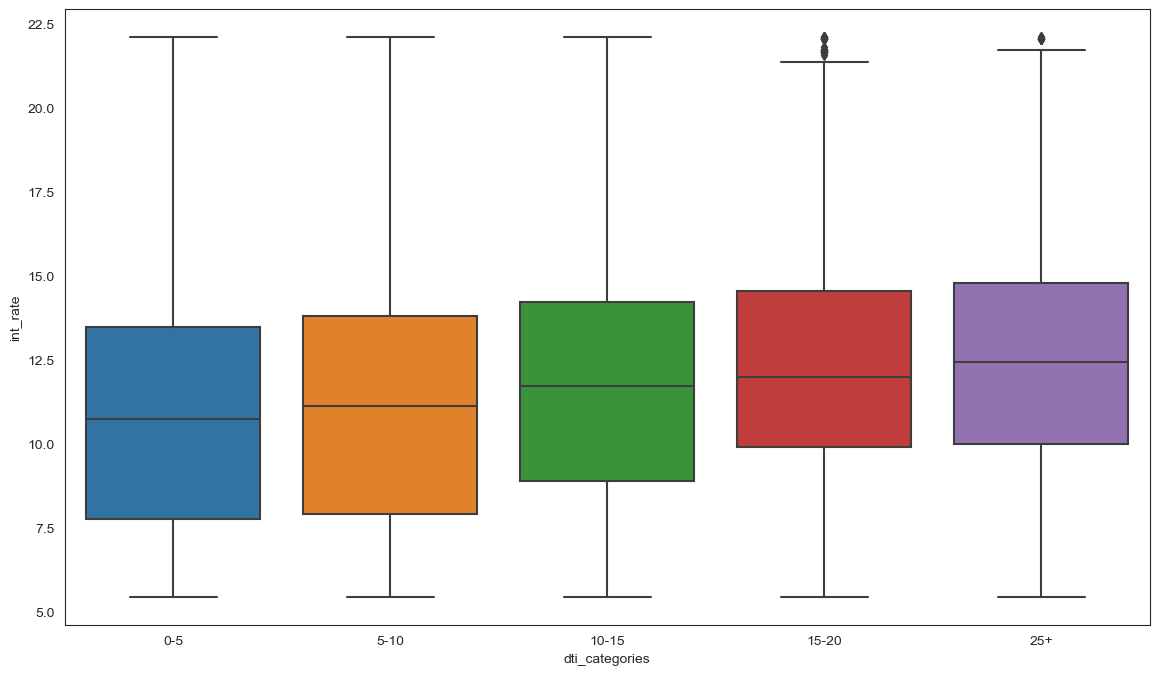

In [273]:
plt.figure(figsize=(14,8))
sns.boxplot(y='int_rate',x='dti_categories',data=loan_Data_2)

plt.show()

# <font color="red">*Observations 25 -</font>
1. DTI is low enough you may get a lower interest rate.
1. Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.So if DTI is low enough you may get a lower interest rate


## 9.Segmented Analysis

In [ ]:
#### Analysing Purpose with loan 

In [275]:
loan_Data_2["purpose"].describe

<bound method NDFrame.describe of 0               credit_card
1                       car
2            small_business
3                     other
5                   wedding
                ...        
39711           credit_card
39712      home_improvement
39713           credit_card
39714    debt_consolidation
39716    debt_consolidation
Name: purpose, Length: 34668, dtype: object>

In [277]:
loan_Data_2['loan_status'].value_counts()

loan_status
Fully Paid     29665
Charged Off     5003
Name: count, dtype: int64

In [278]:
# fully paid & charged-off converting it to integer type
loan_Data_2['loan_status_converted'] = loan_Data_2['loan_status'].apply(lambda x: 0 if x=="Fully Paid" else 1)
loan_Data_2['loan_status_converted'] = loan_Data_2['loan_status_converted'].apply(lambda x: pd.to_numeric(x))

In [281]:
loan_Data_2["loan_status_converted"].value_counts()

loan_status_converted
0    29665
1     5003
Name: count, dtype: int64

In [ ]:
## plot for "purpose"

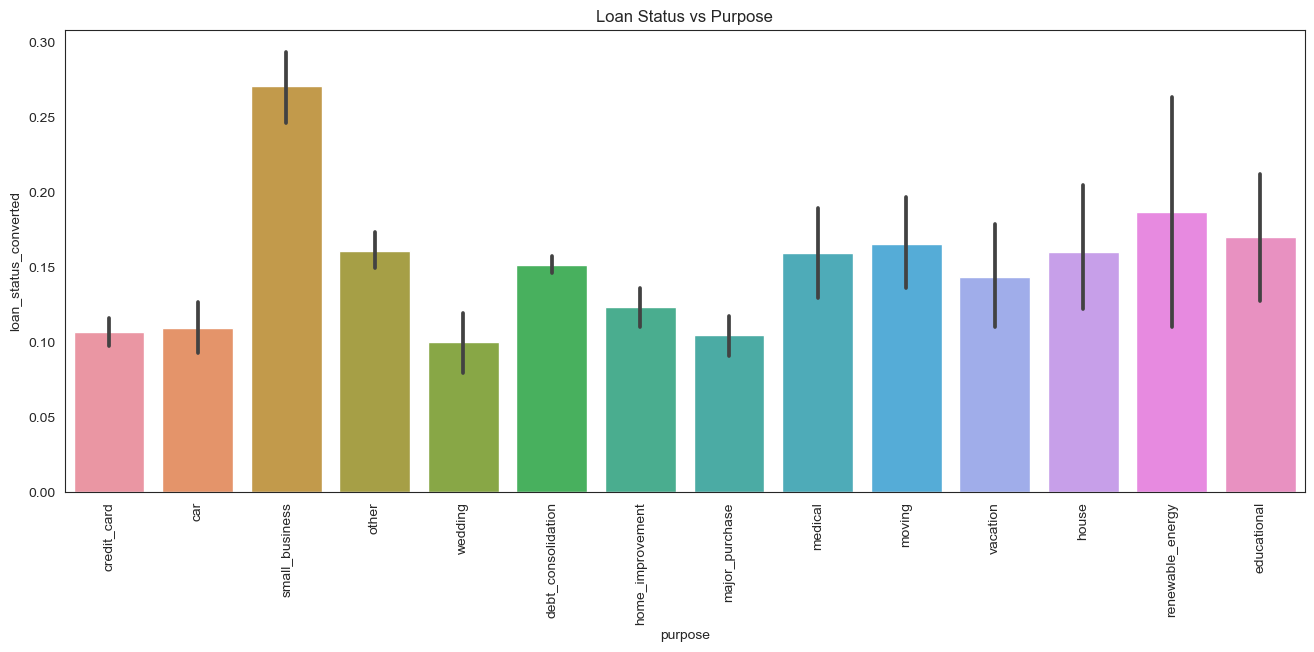

In [285]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.barplot(x="purpose", y='loan_status_converted', data=loan_Data_2)
plt.title("Loan Status vs Purpose")
plt.show()

<Axes: title={'center': 'countplot for purpose'}, xlabel='purpose', ylabel='count'>

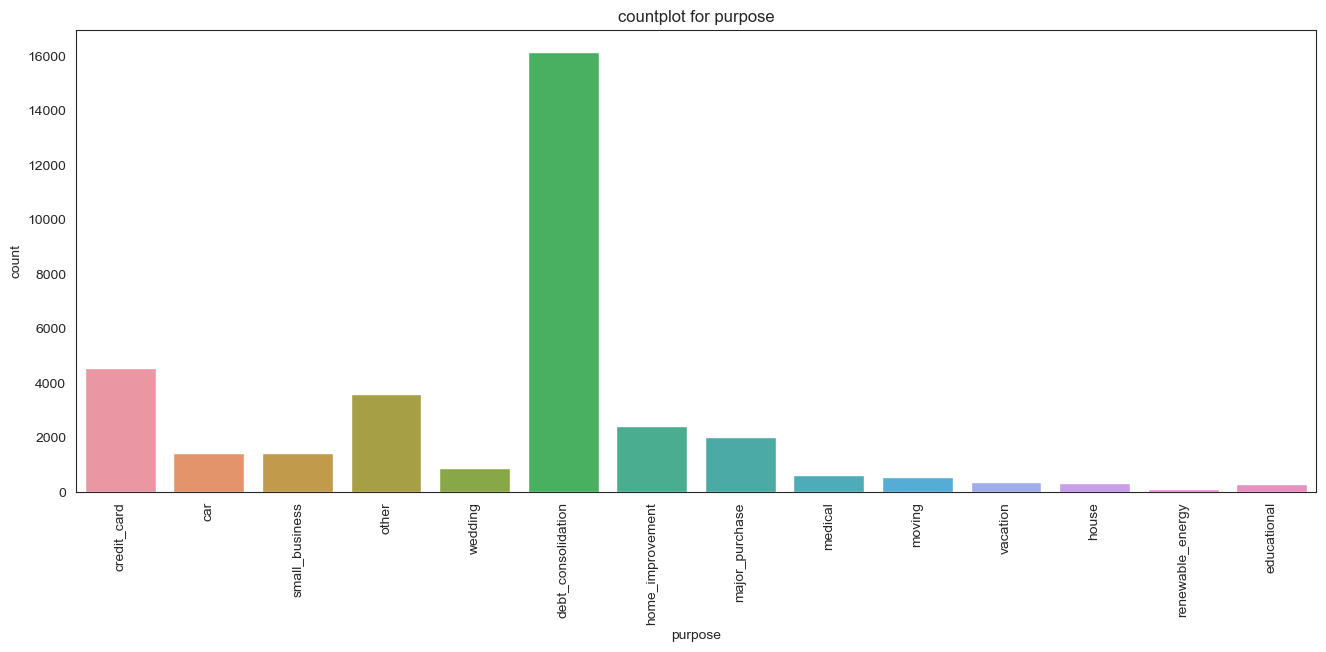

In [287]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title("countplot for purpose")
sns.countplot(x="purpose", data=loan_Data_2 )

# <font color="red">*Observations 26 -</font>
small business has the most loans defualts, followed by renewable energy and education 
but the count plot shows that there is more samples of debt_consolidation. 
The small business has more sample compared to eductation followed by renewable energy  

#### Analyse the 5 most significant purposes as per the above plot

In [288]:
# Lets analysis the purpose whose count are signifcant with respect to loan status and other factors:
five_sigificant_purposes = ["credit_card","small_business","debt_consolidation","home_improvement","major_purchase"]
loan_Data_3 = loan_Data_2[loan_Data_2['purpose'].isin(five_sigificant_purposes)]
loan_Data_3['purpose'].value_counts()

purpose
debt_consolidation    16135
credit_card            4532
home_improvement       2412
major_purchase         1998
small_business         1437
Name: count, dtype: int64

<Axes: title={'center': 'countplot for purpose on new dataset'}, xlabel='purpose', ylabel='count'>

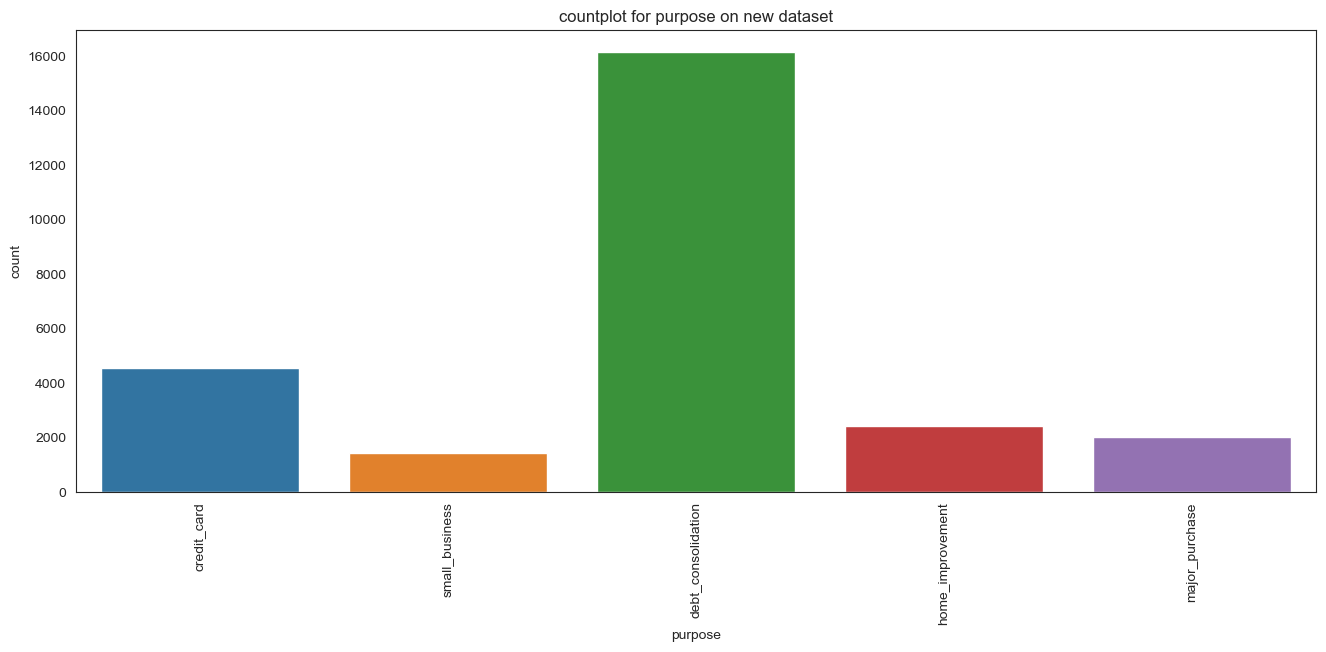

In [289]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title("countplot for purpose on new dataset")
sns.countplot(x="purpose", data=loan_Data_3 )

In [290]:
# a fundtion to derive plot segmented by purpose 

def plot_segmented_for_categorical_variable(varName):
    plt.figure(figsize=(16, 6))
    plt.xticks(rotation=90)
    title = "barplot for " + varName
    plt.title(title)
    sns.barplot(x=str(varName), y='loan_status_converted', hue='purpose', data=loan_Data_3)
    plt.show() 

#### Segmented plot fro Term

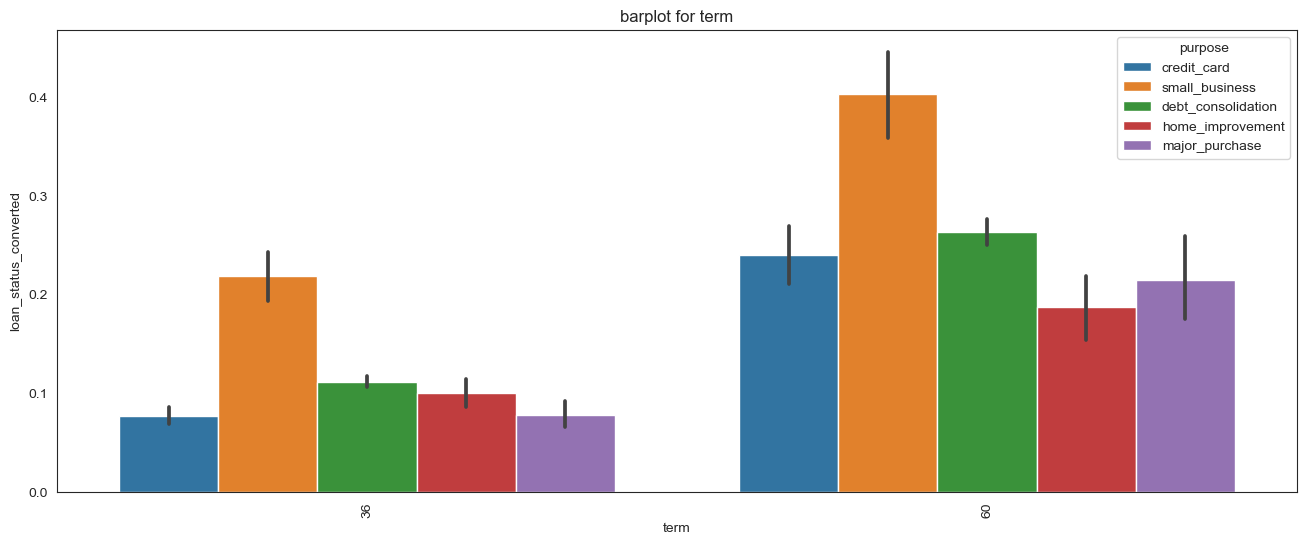

In [291]:
plot_segmented_for_categorical_variable("term")

# <font color="red">*Observations 27 -</font>
 1.Small business has the most loans defualts, followed by debt_consolidation for both terms 36 months and 60 months.

#### Segmented analysis for grade of loan

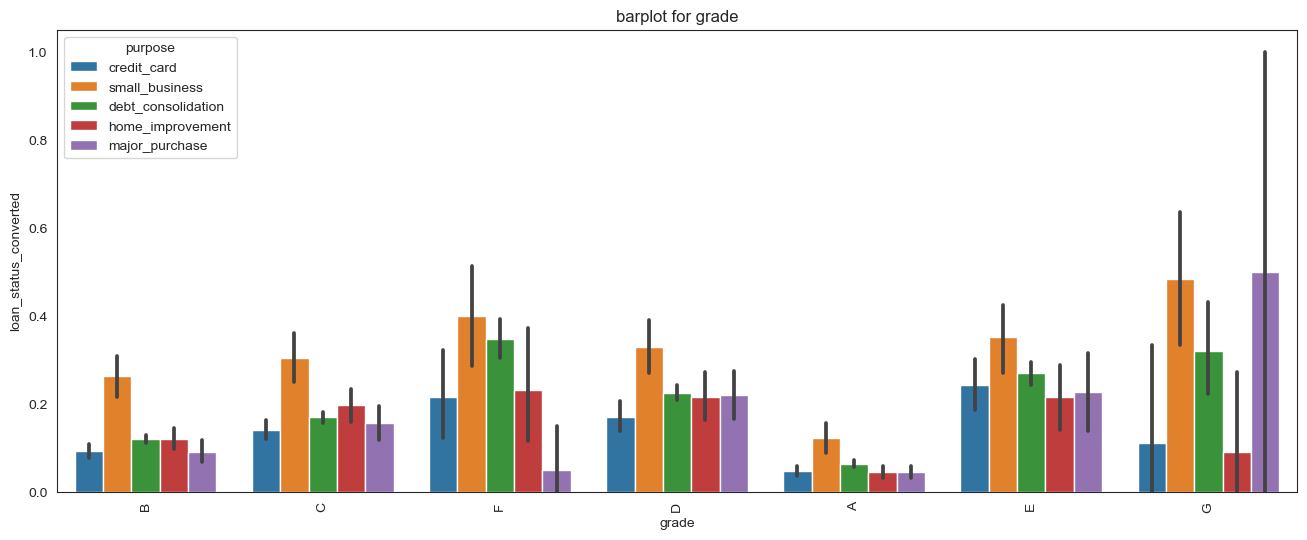

In [292]:
plot_segmented_for_categorical_variable('grade')

# <font color="red">*Observations 28 -</font>
 1. SnSmall Business  has the most loan defaulters in maximum  of the  grade

#### Segmented analysis for employee length of loan

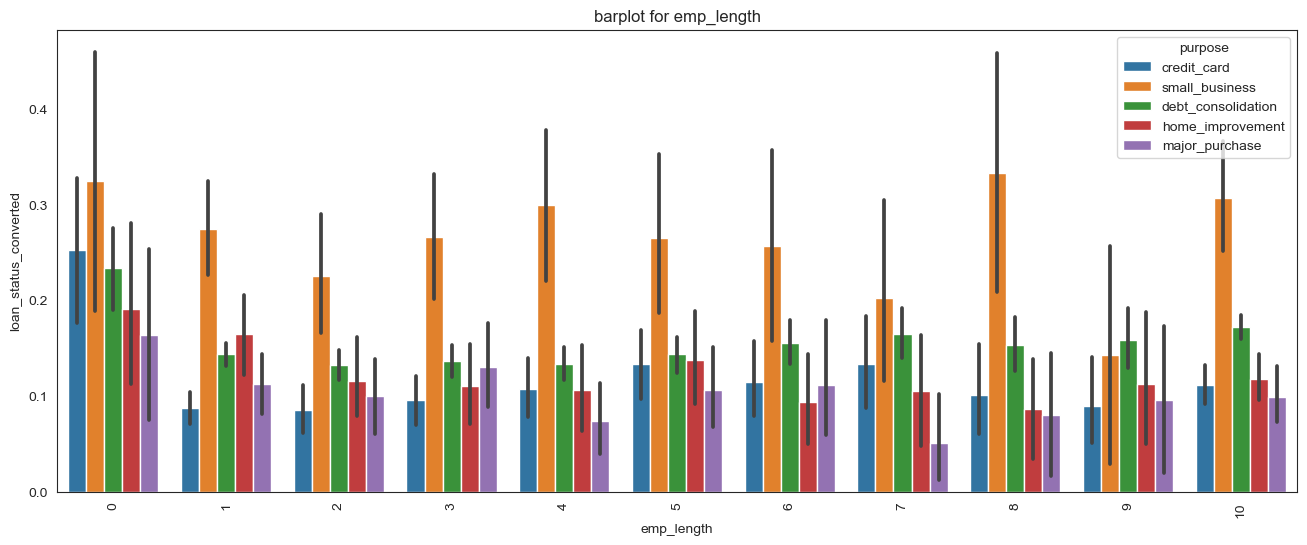

In [294]:
plot_segmented_for_categorical_variable('emp_length')

# <font color="red">*Observations 29 -</font>
 1. For all Employee length small business oan is getting defaulted.

#### Segmented analysis for issue_year of loan

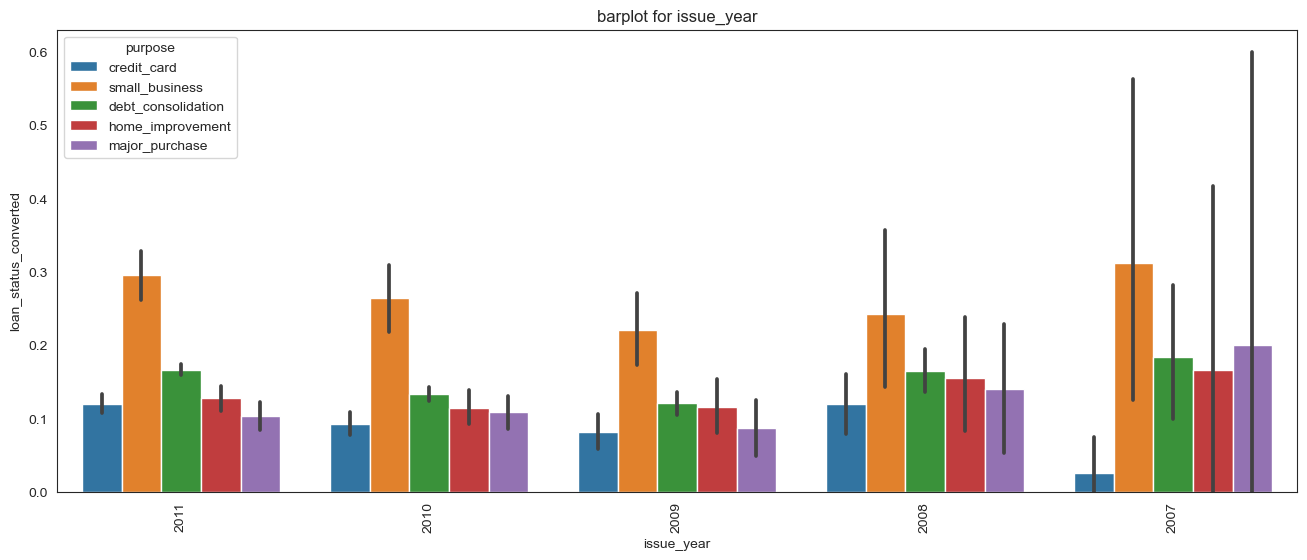

In [295]:
plot_segmented_for_categorical_variable('issue_year')

# <font color="red">*Observations 30 -</font>
 1. For all issue_year, the small business has the most loans defualts.

#### Segmented analysis for Intrest Rate of loan

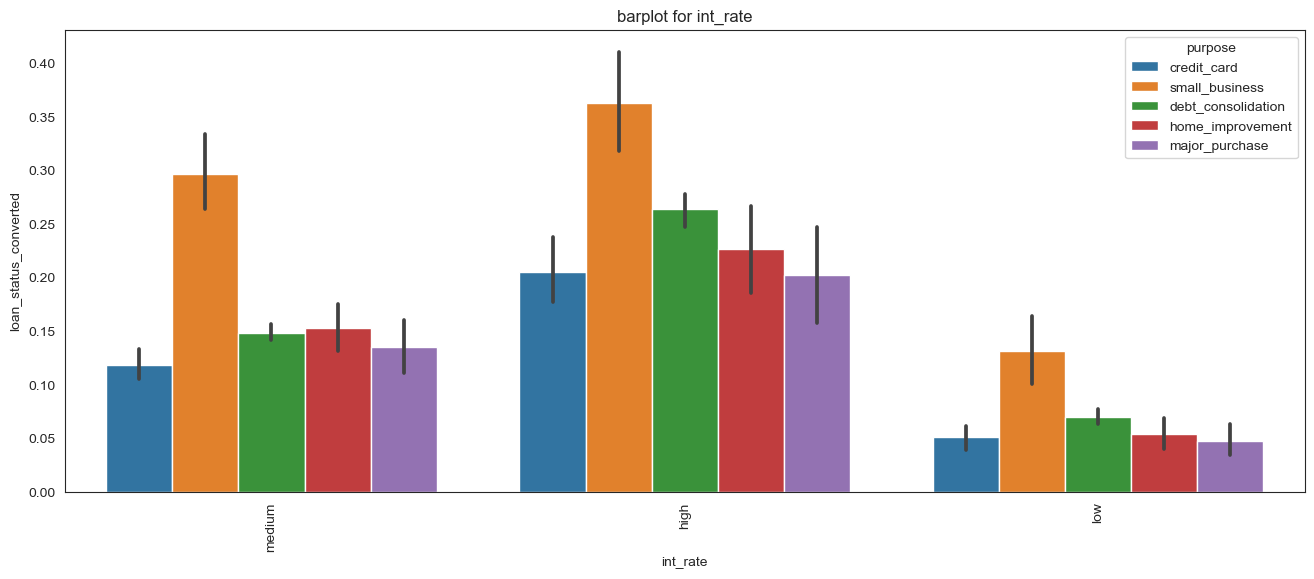

In [296]:
# convert intrest rate low medium and high;

def interest_rate_cat_func(int_value):
    if int_value <= 10:
        return 'low'
    elif int_value > 10 and int_value <=15:
        return 'medium'
    else:
        return 'high'
    
loan_Data_3['int_rate'] = loan_Data_3['int_rate'].apply(lambda x: interest_rate_cat_func(x))
plot_segmented_for_categorical_variable('int_rate')

# <font color="red">*Observations 31 -</font>
 1. Small Business  has the most loan defaulters in all intrest rate range

#### Segmented analysis for dti and loan

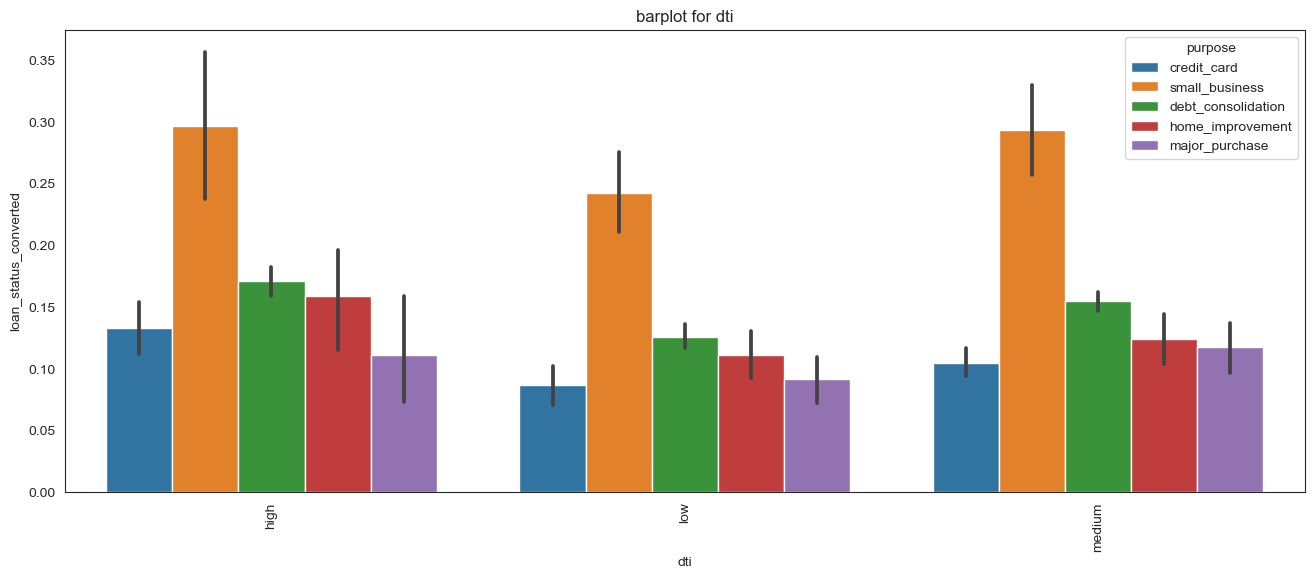

In [297]:
# debt to income ratio
def dti_cat_func(dti_value):
    if dti_value <= 10:
        return 'low'
    elif dti_value > 10 and dti_value <=20:
        return 'medium'
    else:
        return 'high'
    

loan_Data_3['dti'] = loan_Data_3['dti'].apply(lambda x: dti_cat_func(x))


plot_segmented_for_categorical_variable('dti')

# <font color="red">*Observations 32 -</font>
 1. Small Business  has the most loan defaulters in all dti range

#### Segmented analysis for Annual income and loan

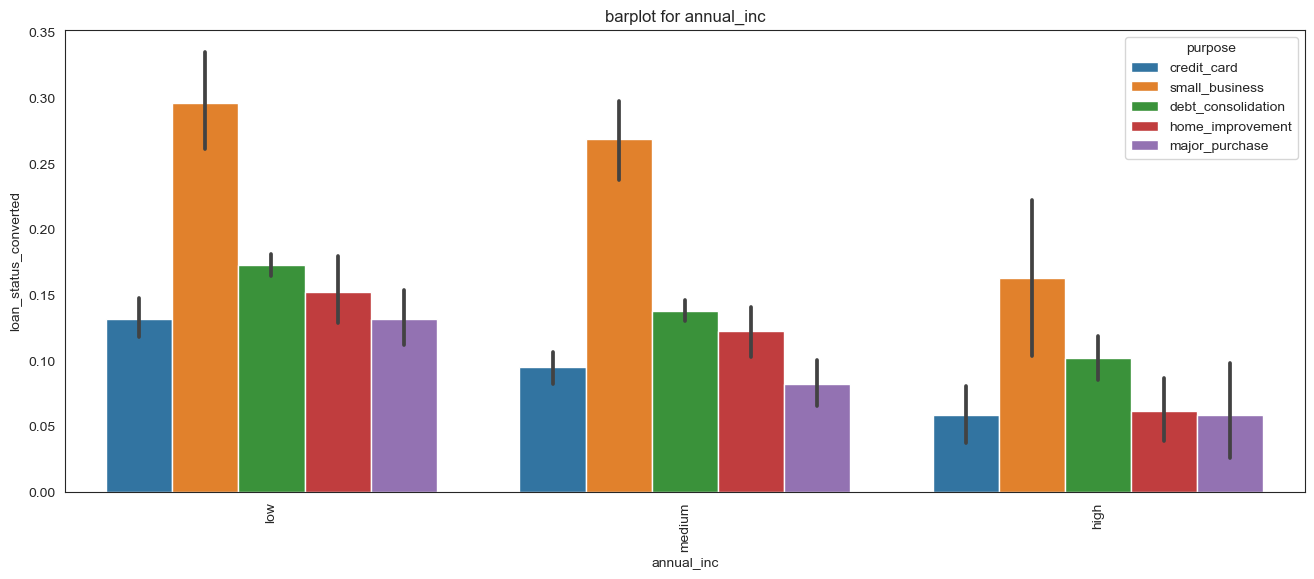

In [298]:
# convert Annual income low medium and high;

def annual_income_cat_func(annual_income_value):
    if annual_income_value <= 50000:
        return 'low'
    elif annual_income_value > 50000 and annual_income_value <=100000:
        return 'medium'
    else:
        return 'high'
    
loan_Data_3['annual_inc'] = loan_Data_3['annual_inc'].apply(lambda x: annual_income_cat_func(x))
plot_segmented_for_categorical_variable('annual_inc')

# <font color="red">*Observations 33 -</font>
 1. Small Business  has the most loan defaulters for each category of income  range

## 10. Multivarient Analysis

In [299]:
# performing multivarient analysis on few specific column relavent for defaulter analysis.
#We are making a copy of this data frame for multivariate analysis for requried set of columns.

loan_multivariate_analysis_df = loan_Data_2[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()
loan_multivariate_analysis_df.head()

,loan_amnt,annual_inc,issue_year,int_rate,loan_status
0,5000.0,24000.0,2011,10.65,Fully Paid
1,2500.0,30000.0,2011,15.27,Charged Off
2,2400.0,12252.0,2011,15.96,Fully Paid
3,10000.0,49200.0,2011,13.49,Fully Paid
5,5000.0,36000.0,2011,7.90,Fully Paid


In [301]:
skewness = loan_multivariate_analysis_df[['loan_amnt', 'annual_inc', 'issue_year','int_rate']].skew()
print(skewness)

loan_amnt     0.727795
annual_inc    0.721205
issue_year   -1.188272
int_rate      0.245557
dtype: object


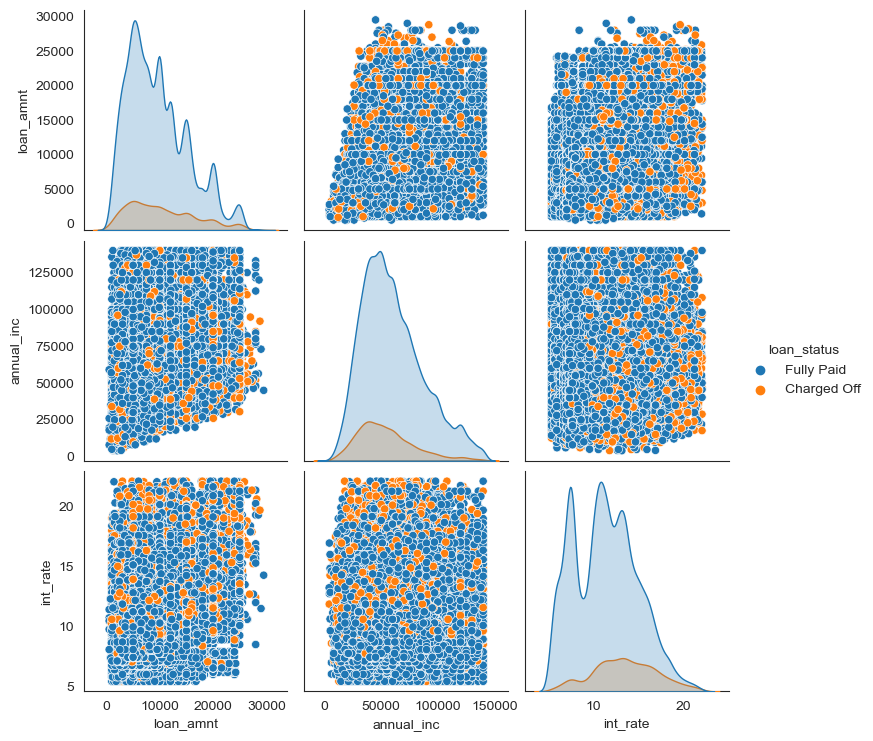

In [304]:
sns.pairplot(loan_multivariate_analysis_df, hue = 'loan_status')
plt.show()

In [305]:
## Try by convertin to log scale 
loan_multivariate_analysis_df['loan_amnt'] = np.log10(loan_multivariate_analysis_df['loan_amnt'])
loan_multivariate_analysis_df['annual_inc'] = np.log10(loan_multivariate_analysis_df['annual_inc'])
loan_multivariate_analysis_df['int_rate'] = np.log10(loan_multivariate_analysis_df['int_rate'])

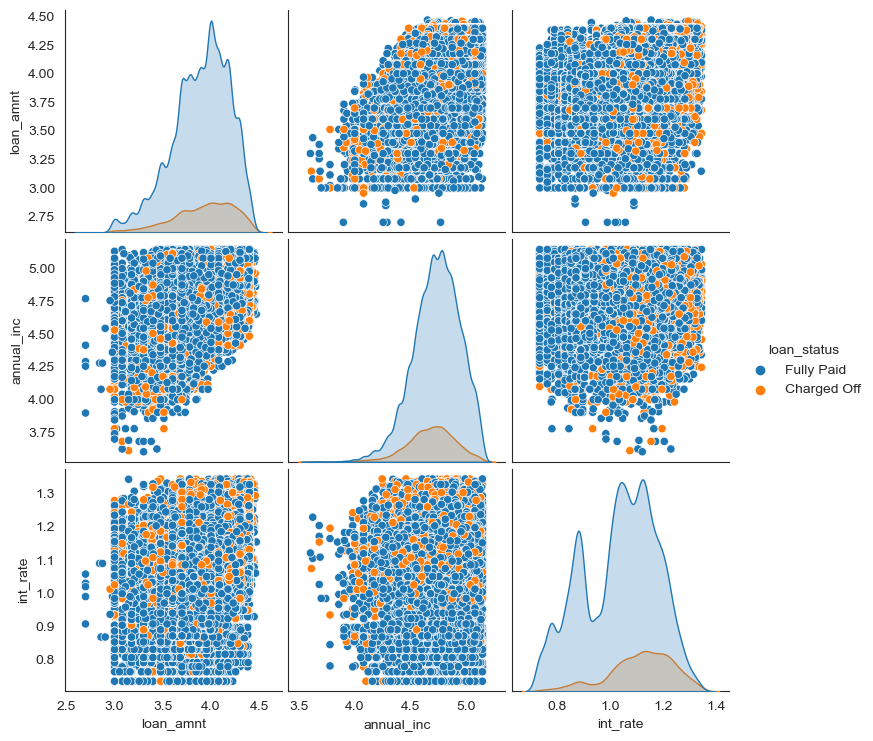

In [306]:
sns.pairplot(loan_multivariate_analysis_df, hue = 'loan_status')
plt.show()

# <font color="red">*Observations 34 -</font>
1. Higher is the charged off ratio for higher intrest rate.
2. Slightly Higher the loan amount for a higher the annual income  .
3. With increase in loan amount there is an increase in intrest rate 

## 11. Correlation Analysis

In [315]:
corrrelation_df = loan_Data_2[["loan_amnt","funded_amnt" , "funded_amnt_inv" , "int_rate" ,"emp_length" ,"annual_inc","dti","total_pymnt","issue_year","term"]]
corrrelation_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,total_pymnt,issue_year,term
0,5000.0,5000.0,4975.0,10.65,10,24000.0,27.65,5863.155187,2011,36
1,2500.0,2500.0,2500.0,15.27,1,30000.0,1.00,1008.710000,2011,60
2,2400.0,2400.0,2400.0,15.96,10,12252.0,8.72,3005.666844,2011,36
3,10000.0,10000.0,10000.0,13.49,10,49200.0,20.00,12231.890000,2011,36
5,5000.0,5000.0,5000.0,7.90,3,36000.0,11.20,5632.210000,2011,36
...,...,...,...,...,...,...,...,...,...,...
39711,5000.0,5000.0,700.0,8.70,5,75000.0,15.55,5698.603286,2007,36
39712,2500.0,2500.0,1075.0,8.07,4,110000.0,11.33,2822.969293,2007,36
39713,8500.0,8500.0,875.0,10.28,3,18000.0,6.40,9913.491822,2007,36
39714,5000.0,5000.0,1325.0,8.07,1,100000.0,2.30,5272.161128,2007,36


In [316]:
loan_correlation=corrrelation_df.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,total_pymnt,issue_year,term
loan_amnt,1.000000,0.977080,0.925016,0.235077,0.139228,0.339156,0.092806,0.865988,0.067710,0.358157
funded_amnt,0.977080,1.000000,0.948673,0.245460,0.139369,0.334183,0.092521,0.886807,0.084871,0.340187
funded_amnt_inv,0.925016,0.948673,1.000000,0.239552,0.148147,0.318928,0.100230,0.855045,0.237298,0.363755
int_rate,0.235077,0.245460,0.239552,1.000000,-0.007452,0.009939,0.104570,0.236394,0.014385,0.422001
emp_length,0.139228,0.139369,0.148147,-0.007452,1.000000,0.210404,0.055375,0.121532,0.090153,0.097583
annual_inc,0.339156,0.334183,0.318928,0.009939,0.210404,1.000000,-0.080548,0.324096,0.024643,0.065607
dti,0.092806,0.092521,0.100230,0.104570,0.055375,-0.080548,1.000000,0.084867,0.091357,0.076600
total_pymnt,0.865988,0.886807,0.855045,0.236394,0.121532,0.324096,0.084867,1.000000,0.073979,0.316826
issue_year,0.067710,0.084871,0.237298,0.014385,0.090153,0.024643,0.091357,0.073979,1.000000,0.215520
term,0.358157,0.340187,0.363755,0.422001,0.097583,0.065607,0.076600,0.316826,0.215520,1.000000


# <font color="red">*Observations 35 -</font> -
 1. Annual Income to dti are negatively correlated 
 2. Loan Amount,Investor Amount and Funding Amount are strongly correlated
 3. Term has a strong correlation with loan amount
 4. Term has a strong correlation with interest rate
 5. Positive correlation between Annual Income and employment years (emp_length) 
 6. annual income has a strong correlation with loan_amount  
 7. Positive correlation between annual income and funded amount that means people with high income gets high funded amount
 8. Positive correlation between annual income and total payment

<Axes: >

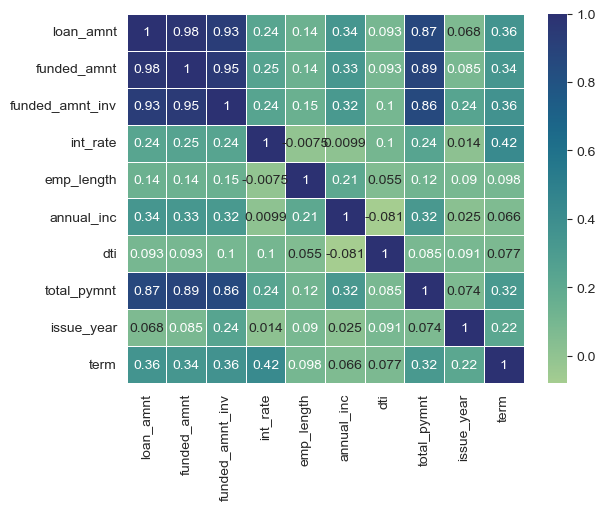

In [319]:
sns.heatmap(loan_correlation , annot=True, cmap="crest", linewidth=.5)